![CCT Logo](cct_logo.jpg)

# CCT College Dublin Continuous Assessment

**Programme Title:** BSc (Hons) in Computing in IT (4th Yr)  
**Delivery Mode:** FT  
**Cohort Details:** BSc (Hons) in Computing in IT - Sept 2021 cohort, Semester 7  
**Module Title(s):** Data Exploration & Preparation  
**Assignment Type:** Individual  
**Weighting(s):** 40%  

## Assignment Details
**Assignment Title:** CA1  
**Lecturer(s):** Dr Muhammad Iqbal  
**Issue Date:** 1st October 2024  
**Submission Deadline:** 24th November 2024 (23:59 IST)  

## Student Details
**Student Name:** Joelma Rodrigues  
**Student Number:** 2023246  
**Date of Submission:** 29th of November 2024  

---

In [1]:
import jupyter_contrib_nbextensions
import numpy as np
from nbconvert import export

# Table of Contents

1. [Introduction](#Introduction)
   - [Shape](#Shape)
   - [Data Types](#Data-Types)
      - [Converting Time Column](#Converting-Time-Column)
   - [Missing Values](#Missing-Values)
2. [Data Preparation](#Data-Preparation)
   - [Handling Large Amounts of Missing Values](#Handling-Large-Amounts-of-Missing-Values)
   - [Imputation](#Imputation)
      - [Imputation by Mean](#Imputation-by-Mean)
      - [K-Nearest Neighbors Imputation](#K-Nearest-Neighbors-Imputation)
      - [Temporal Interpolation](#Temporal-Interpolation)
   - [Feature Engineering](#Feature-Engineering)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
   - [Standard Deviation / Mean / Min / Quartiles / Maximum](#Standard-Deviation)
      - [Total Cyclists Flow](#Total-Cyclists-Flow)
      - [Average Cyclist by Hour of Day](#Average-Cyclist-by-Hour-of-Day)
   - [Outliers](#Outliers)
      - [Identifying Outliers from Grove Road Totem](#Identifying-Outliers-from-Grove-Road-Totem)
      - [Distribution Over Time](#Distribution-Over-Time)
4. [Encoding and PCA](#Encoding-and-PCA)
   - [Label Encoding](#Label-Encoding)
      - [Skewness](#Skewness)
   - [PCA - Principal Component Analysis](#PCA)
      - [Explained Variance Ratio](#Explained-Variance-Ratio)
      - [Optimal Number of Components](#Optimal-Number-of-Components)
      - [Clustering](#Clustering)
            - [K-Means Clustering](#K-Means-Clustering)
                  - [Visualising Clusters](#Visualising-Clusters)
5. [Conclusion](#Conclusion)
6. [References](#References)

# Introduction
 <a id="Introduction"></a>

## Dublin City Cycle Counter - 2023
 
Bicycle traffic volumes from cycle counters in Dublin city. Bike counter include one Totem counter (Grove Road) and Eco-Multi counters using Zelt Diamond loop in a number of other locations. 

**Locations include:** Drumcondra, Charleville Mall, North Strand Rd, Guild Street, Richmond Street and Grove Road. 

Passing cyclists are counted and logged every hour, 24 hours per day, 7 days per week. 

**Data provided** by [Dublin City Council and the NTA](https://data.gov.ie/dataset/dublin-city-centre-cycle-counts/resource/d3dc292c-1612-4474-8218-c0bbddce77b0) 

**Licensed under:** [Creative Commons Attribution 4.0]()

In [2]:
import folium

# Counter locations
bike_counters = [
    {"name": "Charleville Mall", "coords": [53.35694847, -6.245350215], "setup_date": "28/05/2018"},
    {"name": "North Strand Rd", "coords": [53.35853, -6.24134], "setup_date": "28/05/2018"},
    {"name": "Grove Road Totem", "coords": [53.329500, -6.273800], "setup_date": "09/09/2011"},
    {"name": "Griffith Ave", "coords": [53.3796106, -6.2754287], "setup_date": "No Setup Date Available"},
    {"name": "Drumcondra", "coords": [53.368820, -6.255030], "setup_date": "No Setup Date Available"},
    {"name": "Richmond Street", "coords": [53.331254, -6.264631], "setup_date": "No Setup Date Available"},
]

# Centralise map - Dublin
dublin_map = folium.Map(location=[53.3498, -6.2603], zoom_start=13)

# Add pointers
for counter in bike_counters:
    popup_text = f"""
    <b>Bike Counter Location:</b> {counter['name']}<br>
    <b>Setup Date:</b> {counter['setup_date']}<br>
    <b>User Type:</b> Cyclists
    """
    folium.Marker(
        location=counter["coords"],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color="blue", icon="bicycle", prefix="fa"),
    ).add_to(dublin_map)

# Show maps
dublin_map

**Problem Domain:** Population and Society

**Motivation:** To understand the cycling traffic in Dublin city and to identify the peak hours of cycling traffic in different parts of the city.
- This dataset can be used to: 
    - Identify peak traffic in different locations 
    - Justify investment infrastructure in cycle lanes, installation of traffic lights and other measures to protect cyclists.
    - Incentives for sustainable mobility.

**Objective:** To perform exploratory data analysis (EDA) on the dataset to understand the structure and quality of the data before performing further analysis.

**GitHub Repository:** [CA1 - Data Exploration and Preparation](https://github.com/CCT-Dublin/ca1-assignment-40-JoelmaRodrigues2023246.git)

In [3]:
import pandas as pd
from numba.core.lowering import Lower

In [4]:
# Load the dataset - cycle-counts-2023.csv
file_path = 'cycle-counts-2023.csv'
cycle_data = pd.read_csv(file_path)

In [5]:
# Display the first few rows
cycle_data.head()

,Time,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023),Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist West,Clontarf - James Larkin Rd Cyclist East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist West,Clontarf - Pebble Beach Carpark Cyclist East,...,Grove Road Totem OUT,Grove Road Totem IN,North Strand Rd N/B (Counter Removed for Roadworks) Cyclist,North Strand Rd S/B (Counter Removed for Roadworks) Cyclist,Richmond Street Inbound,Richmond Street Inbound Cyclist South,Richmond Street Inbound Cyclist North,Richmond Street Outbound,Richmond Street Outbound Cyclist North,Richmond Street Outbound Cyclist South
0,01/01/2023 00:00,1.0,0.0,1.0,1.0,1.0,0.0,5.0,3.0,2.0,...,6.0,6.0,0.0,NaN,2.0,0.0,2.0,8.0,0.0,8.0
1,01/01/2023 01:00,0.0,0.0,0.0,6.0,4.0,2.0,2.0,2.0,0.0,...,9.0,4.0,0.0,NaN,0.0,0.0,0.0,6.0,0.0,6.0
2,01/01/2023 02:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,4.0,5.0,0.0,NaN,3.0,0.0,3.0,9.0,0.0,9.0
3,01/01/2023 03:00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,7.0,5.0,0.0,NaN,4.0,1.0,3.0,8.0,0.0,8.0
4,01/01/2023 04:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,13.0,4.0,0.0,NaN,4.0,0.0,4.0,4.0,0.0,4.0


## Shape
<a id="Shape"></a>

In [6]:
# Shape of the dataset
cycle_data.shape

(8760, 33)

#### **The Dataset has** 33 columns and 8760 entries.

Total entries is 8760, which means the data is collected every hour (24 hours * 365 = 8760).

And the **33 columns** are the different locations where the cycle counters are placed.

---

## Data Types
<a id="Data-Types"></a>

In [7]:
cycle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 33 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Time                                                                                               8760 non-null   object 
 1   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)                3263 non-null   float64
 2   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist  3263 non-null   float64
 3   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist  3263 non-null   float64
 4   Clontarf - James Larkin Rd                                                                         8759 non-null   float

**Data types:** float64(32), object(1)

Considering the data types, we can see that the data is **mostly numerical**, which are the **cycle counts** for each location.

And there is one column with **object** data type, which is the **Time column**.

---


### Converting Time Column<a id="Converting-Time-Column"></a>

Covert 'Time' column to datetime format

In [8]:
# Convert the Time column to datetime format - errors='raise' to raise an error if the conversion fails
# format='%d/%m/%Y %H:%M'
cycle_data['Time'] = pd.to_datetime(cycle_data['Time'], errors='raise', format='%d/%m/%Y %H:%M')

# See if it was converted
print(cycle_data['Time'].head())

0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
3   2023-01-01 03:00:00
4   2023-01-01 04:00:00
Name: Time, dtype: datetime64[ns]


## Missing Values
<a id="Missing-Values"></a>

In [9]:
# See missing values
missing_values = cycle_data.isnull().sum()

# Show missing values
print(missing_values[missing_values > 0])

Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)                  5497
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist    5497
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist    5497
Clontarf - James Larkin Rd                                                                              1
Clontarf - James Larkin Rd Cyclist West                                                                 1
Clontarf - James Larkin Rd Cyclist East                                                                 1
Clontarf - Pebble Beach Carpark                                                                        15
Clontarf - Pebble Beach Carpark Cyclist West                                                           15
Clontarf - Pebble Beach Carpark Cyclist East                                                           15
Drumcondra Cyclists Inbound (Not On Site - Roa

---

# Data Preparation
<a id="Data-Preparation"></a>

## Handling Large Amounts of Missing Values
<a id="Handling-Large-Amounts-of-Missing-Values"></a>

**North Strand Rd Southbound**
- The counter was removed for roadworks and never reinstalled.
- **100%** (8760) of the data is missing.

In [10]:
# Delete the column: North Strand Rd S/B
cycle_data = cycle_data.drop(columns=['North Strand Rd S/B (Counter Removed for Roadworks) Cyclist'])

**Charleville Mall (North and South)**
- Only worked until 9th May 2023. Counter was removed for roadworks and was not reinstalled.
- **62.25%** (5497) of the data is missing in these columns.

In [11]:
# Delete columns: 
# Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)
# Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist
# Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist

cycle_data = cycle_data.drop(columns=[
    'Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)',
    'Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist',
    'Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist'])

**Drumcondra Cyclists Inbound (West and East)**
- All those columns were not reinstalled after roadworks on the 18th of July 2023.
- **45.59%** (3994) of the data is missing in these columns.

In [12]:
# Delete columns:
# Drumcondra Cyclists Inbound (Not On Site - Roadworks) Cyclist
# Drumcondra Cyclists Inbound (Not On Site - Roadworks) Cyclist West
# Drumcondra Cyclists Inbound (Not On Site - Roadworks) Cyclist East

cycle_data = cycle_data.drop(columns=[
    'Drumcondra Cyclists Inbound (Not On Site - Roadworks) Cyclist',
    'Drumcondra Cyclists Inbound (Not On Site - Roadworks) Cyclist West',
    'Drumcondra Cyclists Inbound (Not On Site - Roadworks) Cyclist East'
])

**See updated dataset:** 
- After removing columns

In [13]:
cycle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 26 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Time                                                                 8760 non-null   datetime64[ns]
 1   Clontarf - James Larkin Rd                                           8759 non-null   float64       
 2   Clontarf - James Larkin Rd Cyclist West                              8759 non-null   float64       
 3   Clontarf - James Larkin Rd Cyclist East                              8759 non-null   float64       
 4   Clontarf - Pebble Beach Carpark                                      8745 non-null   float64       
 5   Clontarf - Pebble Beach Carpark Cyclist West                         8745 non-null   float64       
 6   Clontarf - Pebble Beach Carpark Cyclist East    

**Result:** 26 Columns in total. Dropped 7 columns

**Small amount of missing values in the remaining columns**
- Use imputation to replace missing values

In [14]:
# Sum null values
missing_values = cycle_data.isnull().sum()

# Show missing values
print(missing_values[missing_values > 0])

Clontarf - James Larkin Rd                                              1
Clontarf - James Larkin Rd Cyclist West                                 1
Clontarf - James Larkin Rd Cyclist East                                 1
Clontarf - Pebble Beach Carpark                                        15
Clontarf - Pebble Beach Carpark Cyclist West                           15
Clontarf - Pebble Beach Carpark Cyclist East                           15
Drumcondra Cyclists Outbound (Not On Site - Roadworks)                  1
Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist East     1
Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist West     1
Griffith Avenue (Clare Rd Side)                                         1
Griffith Avenue (Clare Rd Side) Cyclist South                           1
Griffith Avenue (Clare Rd Side) Cyclist North                           1
Griffith Avenue (Lane Side)                                             1
Griffith Avenue (Lane Side) Cyclist So

## Imputation
<a id="Imputation"></a>

**See if the missing values are:**
- Missing at Random **(MAR)**, 
- Missing Completely at Random **(MCAR)**, 
- or Missing not at Random **(MNAR)**

In [15]:
# See where are the missing values of all columns 
# .loc - to locate the missing values + isnull() - to check for missing values
cycle_data.loc[cycle_data.isnull().any(axis=1)]

,Time,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist West,Clontarf - James Larkin Rd Cyclist East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist West,Clontarf - Pebble Beach Carpark Cyclist East,Drumcondra Cyclists Outbound (Not On Site - Roadworks),Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist East,Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist West,...,Grove Road Totem,Grove Road Totem OUT,Grove Road Totem IN,North Strand Rd N/B (Counter Removed for Roadworks) Cyclist,Richmond Street Inbound,Richmond Street Inbound Cyclist South,Richmond Street Inbound Cyclist North,Richmond Street Outbound,Richmond Street Outbound Cyclist North,Richmond Street Outbound Cyclist South
2017,2023-03-26 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3073,2023-05-09 01:00:00,3.0,3.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,7.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3074,2023-05-09 02:00:00,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,5.0,5.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0
3075,2023-05-09 03:00:00,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,5.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
3076,2023-05-09 04:00:00,3.0,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,...,6.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3077,2023-05-09 05:00:00,12.0,7.0,5.0,NaN,NaN,NaN,0.0,0.0,0.0,...,37.0,2.0,35.0,0.0,10.0,0.0,10.0,1.0,0.0,1.0
3078,2023-05-09 06:00:00,28.0,21.0,7.0,NaN,NaN,NaN,0.0,0.0,0.0,...,134.0,25.0,109.0,0.0,42.0,1.0,41.0,22.0,0.0,22.0
3079,2023-05-09 07:00:00,89.0,75.0,14.0,NaN,NaN,NaN,0.0,0.0,0.0,...,373.0,70.0,303.0,0.0,111.0,1.0,110.0,32.0,0.0,32.0
3080,2023-05-09 08:00:00,105.0,84.0,21.0,NaN,NaN,NaN,0.0,0.0,0.0,...,740.0,100.0,640.0,0.0,240.0,0.0,240.0,83.0,1.0,82.0
3081,2023-05-09 09:00:00,54.0,31.0,23.0,NaN,NaN,NaN,0.0,0.0,0.0,...,262.0,46.0,216.0,0.0,151.0,1.0,150.0,34.0,0.0,34.0


**Conclusion:** 

- The missing values are Missing not at Random (MNAR)
- All the columns have 1 missing value: **26th of March 2023 at 02:00:00**
- The **Clontarf** columns have another 14 missing values: **09/05/2023 01:00:00 to 09/05/2023 14:00:00**


### **On the 26 Mar 2023 - Daylight Saving Time Started**

- When local standard time was about to reach Sunday, 26 March 2023, 01:00:00 clocks were turned forward 1 hour to Sunday, 26 March 2023, 02:00:00 local daylight time instead, causing to duplicate the hour, resulting in two entries for the same time, but one of them shows null values.


**Solution:**
- Remove the missing values entries for all columns on the 26th of March 2023 at 02:00:00. 

- There is a duplicate entry for the same time, so we can remove the one with null values.

In [16]:
# Drop the missing values on the 26th of March 2023 at 02:00:00 - Null values
# Keep the other entry
cycle_data = cycle_data[~((cycle_data['Time'] == '26/03/2023 02:00:00') & cycle_data.iloc[:, 1:].isna().all(axis=1))]

In [17]:
# See missing values now
print(cycle_data.isnull().sum())

Time                                                                    0
Clontarf - James Larkin Rd                                              0
Clontarf - James Larkin Rd Cyclist West                                 0
Clontarf - James Larkin Rd Cyclist East                                 0
Clontarf - Pebble Beach Carpark                                        14
Clontarf - Pebble Beach Carpark Cyclist West                           14
Clontarf - Pebble Beach Carpark Cyclist East                           14
Drumcondra Cyclists Outbound (Not On Site - Roadworks)                  0
Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist East     0
Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist West     0
Griffith Avenue (Clare Rd Side)                                         0
Griffith Avenue (Clare Rd Side) Cyclist South                           0
Griffith Avenue (Clare Rd Side) Cyclist North                           0
Griffith Avenue (Lane Side)           

- Handle missing values by replacing them with another value with a determined imputation method.
- The **Clontarf** columns missing 14 values from **09/05/2023 01:00:00 to 09/05/2023 14:00:00**
     - Clontarf - Pebble Beach Carpark
     - Clontarf - Pebble Beach Carpark Cyclist West
     - Clontarf - Pebble Beach Carpark Cyclist East  

---

### Imputation by Mean<a id="Imputation-by-Mean"></a>
**1st Method: Mean Imputation (by hour and working day) Clontarf - Pebble Beach Carpark**
- Calculate the mean of the values for the same hour and working day (Monday to Friday) and replace the missing values with the mean value.
    - **1st** - Calculate the mean of the values for the same hour and working day (Monday to Friday)
    - **2nd** - Replace the missing values with the mean value
    - **3rd** - Round the mean value to the nearest integer (since the values are counts of cyclists)

**Example:** 09/05/2023 01:00:00 - Monday - missing value calculate all the others 1:00:00 on Monday and replace the missing value with the mean value.

In [18]:
# Missing values interval ()
start_missing = '2023-05-09 01:00:00'
end_missing = '2023-05-09 14:00:00'

# List: store the hours from 01:00 to 14:00 ('h' frequency)
missing_hours = pd.date_range(start=start_missing, end=end_missing, freq='h')

# use this on the others imputation methods

In [19]:
# Working days - creates new column where Monday is 0 and Friday is 4
cycle_data['weekday'] = cycle_data['Time'].dt.weekday
working_days = cycle_data[cycle_data['weekday'] < 5]

In [20]:
# Calculate the mean of the values for the same hour and working day (Monday to Friday)
# Group by hour and weekday in Clontarf - Pebble Beach Carpark
mean_hour = working_days.groupby(working_days['Time'].dt.hour)['Clontarf - Pebble Beach Carpark'].mean()

In [21]:
# Replace the missing values with the mean value
for hour in missing_hours:
    cycle_data.loc[
        (cycle_data['Time'] == hour), 'Clontarf - Pebble Beach Carpark'
    ] = mean_hour[hour.hour]

In [22]:
# see changes
cycle_data.loc[cycle_data['Time'].between(start_missing, end_missing), ['Time', 'Clontarf - Pebble Beach Carpark']]

,Time,Clontarf - Pebble Beach Carpark
3073,2023-05-09 01:00:00,0.891892
3074,2023-05-09 02:00:00,0.922780
3075,2023-05-09 03:00:00,0.884170
3076,2023-05-09 04:00:00,2.633205
3077,2023-05-09 05:00:00,6.810811
3078,2023-05-09 06:00:00,27.942085
3079,2023-05-09 07:00:00,71.308880
3080,2023-05-09 08:00:00,112.034749
3081,2023-05-09 09:00:00,62.517375
3082,2023-05-09 10:00:00,57.088803


In [23]:
# Round the mean value -> nearest integer
cycle_data['Clontarf - Pebble Beach Carpark'] = cycle_data['Clontarf - Pebble Beach Carpark'].round().astype(int)

In [24]:
# See changes
cycle_data.loc[cycle_data['Time'].between(start_missing, end_missing), ['Time', 'Clontarf - Pebble Beach Carpark']]

,Time,Clontarf - Pebble Beach Carpark
3073,2023-05-09 01:00:00,1
3074,2023-05-09 02:00:00,1
3075,2023-05-09 03:00:00,1
3076,2023-05-09 04:00:00,3
3077,2023-05-09 05:00:00,7
3078,2023-05-09 06:00:00,28
3079,2023-05-09 07:00:00,71
3080,2023-05-09 08:00:00,112
3081,2023-05-09 09:00:00,63
3082,2023-05-09 10:00:00,57


### K-Nearest Neighbors Imputation<a id="K-Nearest-Neighbors-Imputation"></a>
**2nd Method: KNN (by hour and working day) Clontarf - Pebble Beach Carpark West**
- Fill the missing values with the mean of the nearest neighbors by calculating the distance between the values.

- **Steps**:
    1. check correlation
    2. subset the columns
    3. apply knn
    4. index of the missing values
    5. fill in the missing values
    6. round the mean value to the nearest integer

In [25]:
# KNN - K-Nearest Neighbors
from sklearn.impute import KNNImputer

In [26]:
print("Missing Values before using KNN Imputation:")
print(cycle_data['Clontarf - Pebble Beach Carpark Cyclist West'].isnull().sum())

Missing Values before using KNN Imputation:
14


In [27]:
# correlation - columns to use for knn
correlation = cycle_data.corr()
print(correlation['Clontarf - Pebble Beach Carpark Cyclist West'].sort_values(ascending=False))

Clontarf - Pebble Beach Carpark Cyclist West                           1.000000
Clontarf - James Larkin Rd Cyclist West                                0.967772
Clontarf - Pebble Beach Carpark                                        0.904458
Clontarf - James Larkin Rd                                             0.886982
Richmond Street Inbound Cyclist North                                  0.697494
Richmond Street Inbound                                                0.697290
Clontarf - James Larkin Rd Cyclist East                                0.689931
Clontarf - Pebble Beach Carpark Cyclist East                           0.688992
Grove Road Totem IN                                                    0.648505
Grove Road Totem                                                       0.627652
Griffith Avenue (Clare Rd Side) Cyclist South                          0.611913
Griffith Avenue (Clare Rd Side)                                        0.611913
Griffith Avenue (Lane Side)             

In [28]:
#knn columns
knn_columns = ['Clontarf - Pebble Beach Carpark Cyclist West',
               'Clontarf - James Larkin Rd Cyclist West',
               'Clontarf - Pebble Beach Carpark Cyclist West',
               'Clontarf - James Larkin Rd',
               'Richmond Street Inbound Cyclist North',
               'Richmond Street Inbound']

In [29]:
# Subset (knn impute recon the missing values)
cycle_data_knn = cycle_data[knn_columns]

In [30]:
# apply knn
imputed_values = KNNImputer(n_neighbors=3)
cycle_data_knn_imputed = pd.DataFrame(
    imputed_values.fit_transform(cycle_data_knn),
    columns=knn_columns,
    index=cycle_data.index  
)

In [31]:
# Index of the missing values
# indexes: 09/05/2023 01:00:00 to 09/05/2023 14:00:00
missing_indices = cycle_data[cycle_data['Time'].isin(missing_hours)].index

In [32]:
cycle_data.loc[missing_indices, 'Clontarf - Pebble Beach Carpark Cyclist West'] = (
    cycle_data_knn_imputed.iloc[missing_indices, 0].values)

In [33]:
print("Missing Values after using KNN Imputation:")
print(cycle_data['Clontarf - Pebble Beach Carpark Cyclist West'].isnull().sum())

Missing Values after using KNN Imputation:
0


In [34]:
# Round the mean value to the nearest integer
cycle_data['Clontarf - Pebble Beach Carpark Cyclist West'] = cycle_data['Clontarf - Pebble Beach Carpark Cyclist West'].round().astype(int)

In [35]:
# Check the values filled in
print(cycle_data.loc[missing_indices, 'Clontarf - Pebble Beach Carpark Cyclist West'])

3073      0
3074      0
3075      0
3076      8
3077     26
3078     89
3079    137
3080     47
3081     35
3082     44
3083     42
3084     54
3085     18
3086     23
Name: Clontarf - Pebble Beach Carpark Cyclist West, dtype: int64


### Temporal Interpolation<a id="Temporal-Interpolation"></a>
**3rd Method -> Clontarf - Pebble Beach Carpark East**
- Fill the missing values with time intervals between the known values.

- **Steps**:
    1. Transform 'Time' index: already in datetime format
    2. Apply interpolation
    3. Reset the index
    4. Verify missing values

In [36]:
# Check the missing values
print("Missing Values BEFORE Interpolation:")
print(cycle_data['Clontarf - Pebble Beach Carpark Cyclist East'].isnull().sum())

Missing Values BEFORE Interpolation:
14


In [37]:
# Transform 'Time' index 
# why -> interpolation method requires the index to be in datetime format
cycle_data.set_index('Time', inplace=True)

In [38]:
# Apply interpolation
cycle_data['Clontarf - Pebble Beach Carpark Cyclist East'] = cycle_data['Clontarf - Pebble Beach Carpark Cyclist East'].interpolate(method='time')

In [39]:
# Reset the index
cycle_data.reset_index(inplace=True)

In [40]:
# Check result
print(cycle_data.loc[cycle_data['Time'].isin(missing_hours), ['Time', 'Clontarf - Pebble Beach Carpark Cyclist East']])

                    Time  Clontarf - Pebble Beach Carpark Cyclist East
3072 2023-05-09 01:00:00                                           3.0
3073 2023-05-09 02:00:00                                           5.0
3074 2023-05-09 03:00:00                                           7.0
3075 2023-05-09 04:00:00                                           9.0
3076 2023-05-09 05:00:00                                          11.0
3077 2023-05-09 06:00:00                                          13.0
3078 2023-05-09 07:00:00                                          15.0
3079 2023-05-09 08:00:00                                          17.0
3080 2023-05-09 09:00:00                                          19.0
3081 2023-05-09 10:00:00                                          21.0
3082 2023-05-09 11:00:00                                          23.0
3083 2023-05-09 12:00:00                                          25.0
3084 2023-05-09 13:00:00                                          27.0
3085 2

In [41]:
# Verify missing values
print("Missing Values - After interpolation:")
print(cycle_data['Clontarf - Pebble Beach Carpark Cyclist East'].isnull().sum())

Missing Values - After interpolation:
0


---

**Columns with only 0 values**
- Boxplot helps to identify outliers in Drumcondra Cyclists Outbound (Not On Site - Roadworks)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

- **Columns where the counters were blocked for roadworks.**
    - Drumcondra Cyclists Outbound (Not On Site - Roadworks)
    - Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist East
    - Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist West
    - North Strand Rd N/B (Counter Removed for Roadworks) Cyclist

- Columns where there are no cyclists passing by.
    - Griffith Avenue (Clare Rd Side) Cyclist North
    - Griffith Avenue (Lane Side) Cyclist North

**Note:** 0 values are not considered missing values, as they represent the absence of cyclists passing by the counters. However, they are not important for the analysis of the cycling traffic in Dublin city, since there are other columns with data from the same location.

**Removing Columns with 0 values**

In [43]:
columns_to_drop = [
    'Drumcondra Cyclists Outbound (Not On Site - Roadworks)',
    'Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist East',
    'Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist West',
    'North Strand Rd N/B (Counter Removed for Roadworks) Cyclist',
    'Griffith Avenue (Clare Rd Side) Cyclist North',
    'Griffith Avenue (Lane Side) Cyclist North'
]
cycle_data.drop(columns=columns_to_drop, inplace=True)

In [44]:
# Verify the columns were removed  
cycle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Time                                           8759 non-null   datetime64[ns]
 1   Clontarf - James Larkin Rd                     8759 non-null   float64       
 2   Clontarf - James Larkin Rd Cyclist West        8759 non-null   float64       
 3   Clontarf - James Larkin Rd Cyclist East        8759 non-null   float64       
 4   Clontarf - Pebble Beach Carpark                8759 non-null   int64         
 5   Clontarf - Pebble Beach Carpark Cyclist West   8759 non-null   int64         
 6   Clontarf - Pebble Beach Carpark Cyclist East   8759 non-null   float64       
 7   Griffith Avenue (Clare Rd Side)                8759 non-null   float64       
 8   Griffith Avenue (Clare Rd Side) Cyclist South  8759 non-nu

In [45]:
# Shape of the dataset
cycle_data.shape

(8759, 21)

**Conclusion:** There are only 21 columns now

### **Converting Columns to Float**
- converting the columns to float to standardize the data

In [46]:
# Convert columns to float
cycle_data['Clontarf - Pebble Beach Carpark'] = cycle_data['Clontarf - Pebble Beach Carpark'].astype(float)
cycle_data['Clontarf - Pebble Beach Carpark Cyclist West'] = cycle_data['Clontarf - Pebble Beach Carpark Cyclist West'].astype(float)

In [47]:
print(cycle_data.dtypes)

Time                                             datetime64[ns]
Clontarf - James Larkin Rd                              float64
Clontarf - James Larkin Rd Cyclist West                 float64
Clontarf - James Larkin Rd Cyclist East                 float64
Clontarf - Pebble Beach Carpark                         float64
Clontarf - Pebble Beach Carpark Cyclist West            float64
Clontarf - Pebble Beach Carpark Cyclist East            float64
Griffith Avenue (Clare Rd Side)                         float64
Griffith Avenue (Clare Rd Side) Cyclist South           float64
Griffith Avenue (Lane Side)                             float64
Griffith Avenue (Lane Side) Cyclist South               float64
Grove Road Totem                                        float64
Grove Road Totem OUT                                    float64
Grove Road Totem IN                                     float64
Richmond Street Inbound                                 float64
Richmond Street Inbound Cyclist South   

---

## Feature Engineering
<a id="Feature-Engineering"></a>
**New Column: time_day**
- The Time_of_Day column will help to identify the peak hours of cycling traffic in Dublin city.
- It gives insights into the cycling traffic during the day.
- And help with the Encoding process.

In [48]:
def time_period_from_time(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

cycle_data['time_day'] = cycle_data['Time'].apply(time_period_from_time)

In [49]:
# See the new column: time_day
cycle_data['time_day'].head()

0    Night
1    Night
2    Night
3    Night
4    Night
Name: time_day, dtype: object

**Conclusion:** New column now to represent the time of the day.
- The **time_day** column (categorical data):
    - Morning
    - Afternoon
    - Evening
    - Night

# Exploratory Data Analysis (EDA)
<a id="Exploratory-Data-Analysis"></a>

## Standard Deviation / Mean / Min / Quartiles / Maximum
<a id="Standard-Deviation"></a>

- **count** -> non-null values    (identifies missing values)
- **mean** -> average value       (sum of all values divided by the number of values)
- **std** -> standard deviation   (measure of the amount of variation or dispersion of a set of values)
- **min** -> minimum value        (smallest value)
- **25%** -> first quartile       (Q1 - 25% of the values are below this value)
- **50%** -> median               (Q2 - 50% of the values are below this value)
- **75%** -> third quartile       (Q3 - 75% of the values are below this value)
- **max** -> maximum value        (highest value)

In [50]:
# Describe the dataset - no categorical columns
cycle_data.describe()

,Time,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist West,Clontarf - James Larkin Rd Cyclist East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist West,Clontarf - Pebble Beach Carpark Cyclist East,Griffith Avenue (Clare Rd Side),Griffith Avenue (Clare Rd Side) Cyclist South,Griffith Avenue (Lane Side),...,Grove Road Totem,Grove Road Totem OUT,Grove Road Totem IN,Richmond Street Inbound,Richmond Street Inbound Cyclist South,Richmond Street Inbound Cyclist North,Richmond Street Outbound,Richmond Street Outbound Cyclist North,Richmond Street Outbound Cyclist South,weekday
count,8759,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,...,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,2023-07-02 11:46:11.001255680,36.288275,17.798950,18.489325,51.249572,23.872817,27.393538,11.364083,11.364083,3.798721,...,110.456102,48.419568,62.036534,52.205503,0.254938,51.950565,45.493435,0.254139,45.239297,3.007878
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-04-02 06:30:00,3.000000,2.000000,1.000000,5.000000,2.000000,3.000000,2.000000,2.000000,0.000000,...,27.000000,12.000000,11.000000,11.000000,0.000000,11.000000,11.000000,0.000000,11.000000,1.000000
50%,2023-07-02 12:00:00,23.000000,10.000000,10.000000,33.000000,14.000000,15.000000,8.000000,8.000000,0.000000,...,82.000000,32.000000,43.000000,51.000000,0.000000,51.000000,36.000000,0.000000,35.000000,3.000000
75%,2023-10-01 17:30:00,56.000000,27.000000,27.000000,78.000000,35.000000,38.000000,16.000000,16.000000,4.000000,...,130.000000,58.000000,70.000000,78.000000,0.000000,77.500000,63.000000,0.000000,63.000000,5.000000
max,2023-12-31 23:00:00,301.000000,145.000000,159.000000,413.000000,200.000000,269.000000,76.000000,76.000000,149.000000,...,802.000000,406.000000,689.000000,278.000000,4.000000,277.000000,309.000000,5.000000,308.000000,6.000000
std,NaN,40.601238,20.770857,23.076030,57.336971,28.642325,33.740142,12.191973,12.191973,9.876042,...,122.013489,58.612451,87.417815,44.149151,0.538506,44.012794,44.498050,0.552588,44.341824,2.003379


**Findings**
1. **Count:** The number of counts is regular, all columns have 8759 entries. Indicates the data is complete. No missing values.

2. **Mean:** The average value of the cycle counts for each location varies, which is expected. Indicates the average traffic for each location.
    - **Grove Road Totem** has the highest average count of 110.
    - **Richmond Street Inbound Cyclist South/North** has the lowest average count of 0.25.
        
3. **Min:** The minimum value is 0 for all columns, because there were no cyclists passing by the counters at that time.

4. **Max:** The maximum value varies for each location, which is expected due to the different traffic volumes in each location.
    - **Grove Road Totem** has the highest maximum count of 802. Probably due to an event or hot day.
    - **Richmond Street Inbound Cyclist South** has the lowest maximum count of 0.55.
        
5. **Quartiles:** The quartiles show that the dataset is not normally distributed, with a long tail on the right side with higher values.
    - The difference between the 75th percentile and the maximum value is high, indicating the presence of outliers.
        - Example: **Grove Road Totem**  75% of the values are below 130. But the maximum value is 802.

6. **Standard Deviation:** The **Grove Road Totem** has the highest standard deviation of 122. More variation in the data. Probably due to peaks in traffic.
    - And **Richmond Street Inbound Cyclist South** has the lowest standard deviation of 0.53. Less variation in the data. More stable traffic.

## Outliers
<a id="Outliers"></a>

In [51]:
# numeric columns
numeric_columns = cycle_data.select_dtypes(include=['float64', 'int64'])

# outliers limits
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

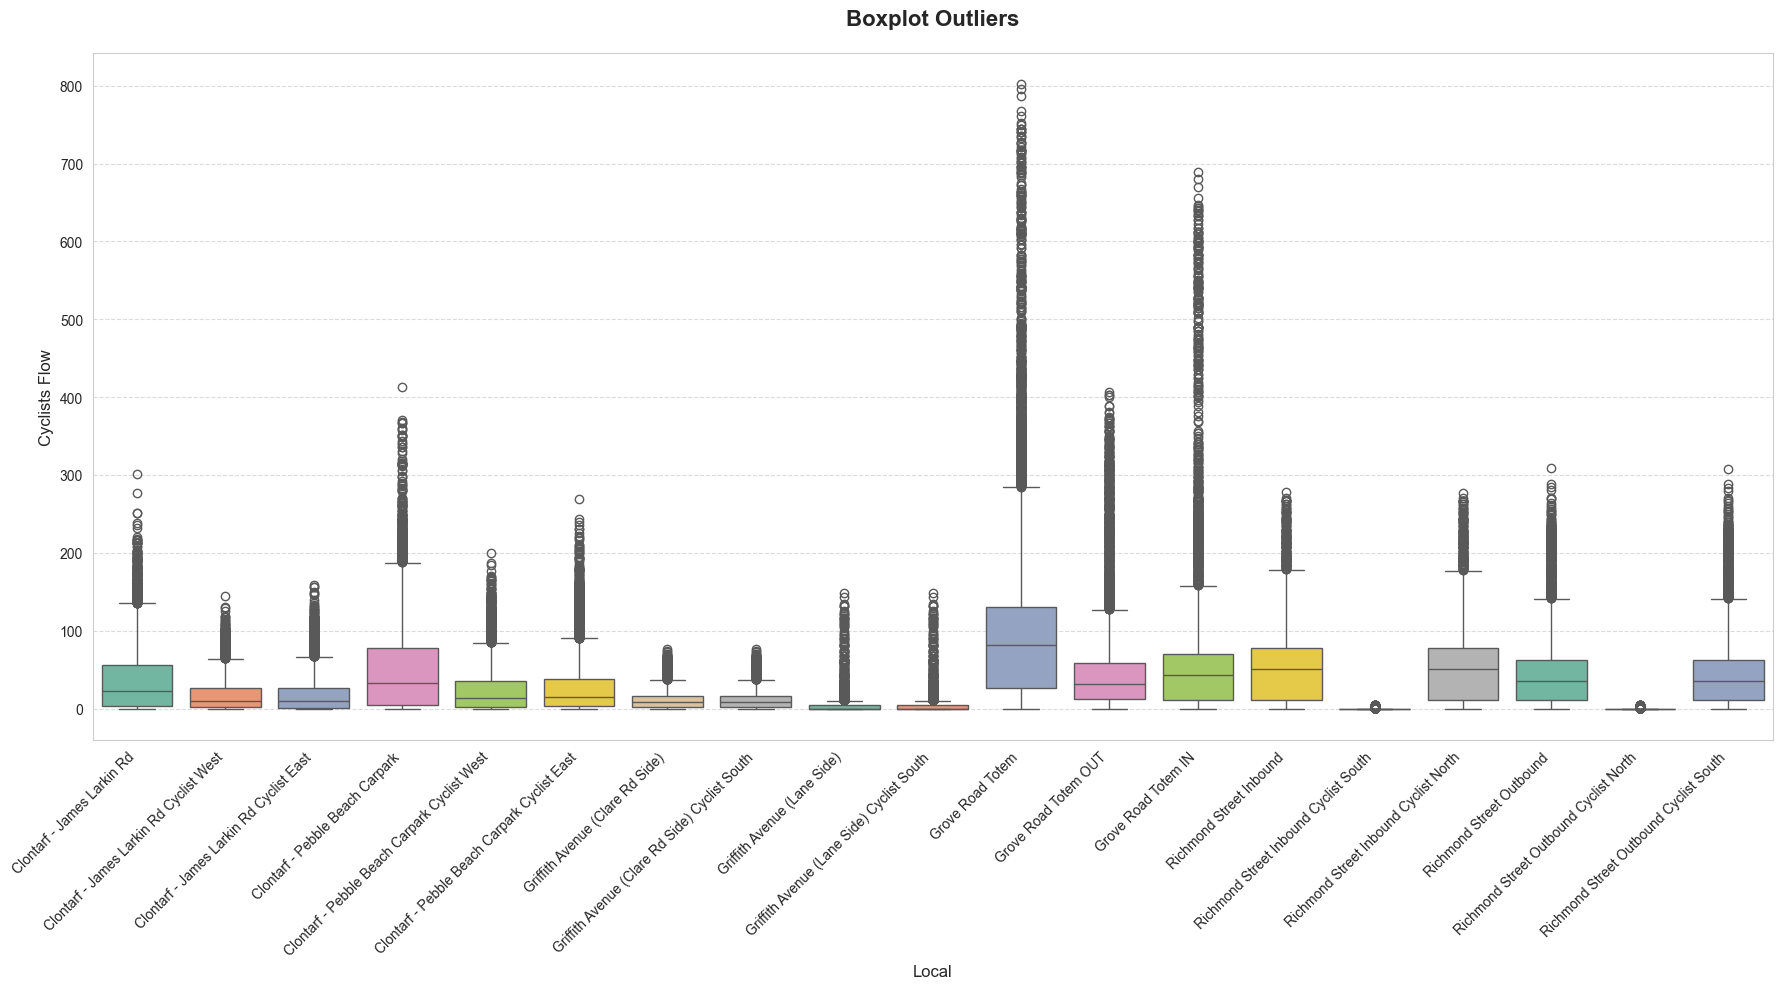

In [52]:
# Creating boxplot
plt.figure(figsize=(18, 10))
sns.boxplot(data=numeric_columns, palette="Set2", showfliers=True)

# Titles and labels
plt.title("Boxplot Outliers", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Local", fontsize=12)
plt.ylabel("Cyclists Flow", fontsize=12)

# Rotate location name
plt.xticks(rotation=45, ha='right', fontsize=10)

# grade effect
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show graph
plt.tight_layout()
plt.show()

**Findings**
- Using IQR method to identify the outliers in the dataset shows that most of the columns have high number of outliers. 
- This is because the data is right-skewed, with a long tail on the right side with higher values.
- But this is normal, since the outliers represents the variations in traffic - sometimes due to peak hours or some event.

**Note:** The boxplot shows the distribution of the data, with the outliers represented by the dots outside the whiskers.

### Identifying Outliers from Grove Road Totem

In [53]:
top_grove_totem_flows = (cycle_data.assign(Day_of_Week=cycle_data['Time'].dt.day_name())
                         .loc[:, ['Time', 'Grove Road Totem', 'Day_of_Week']]
                         .rename(columns={'Grove Road Totem': 'Flow'})
                         .sort_values(by='Flow', ascending=False)
                         .head(10))
print(top_grove_totem_flows)

                    Time   Flow Day_of_Week
6775 2023-10-10 08:00:00  802.0     Tuesday
3583 2023-05-30 08:00:00  796.0     Tuesday
6127 2023-09-13 08:00:00  787.0   Wednesday
3247 2023-05-16 08:00:00  767.0     Tuesday
2575 2023-04-18 08:00:00  761.0     Tuesday
5935 2023-09-05 08:00:00  752.0     Tuesday
560  2023-01-24 08:00:00  750.0     Tuesday
6943 2023-10-17 08:00:00  745.0     Tuesday
6607 2023-10-03 08:00:00  745.0     Tuesday
4087 2023-06-20 08:00:00  745.0     Tuesday


- The outliers in the Grove Road Totem column are due to the high number of cyclists passing by the counter nearly every Tuesday, 
- They actually represent the peak hours of cycling traffic in Dublin city, which is mostly 8 AM every Tuesday.

- That is why Grove Road Totem is the busiest location in Dublin city, with nearly 1 million cyclists in 2023.

## Correlation
<a id="Correlation"></a>
- See the relationship between the columns.
- Some locations are very likely to have a high correlation, since they are close to each other.

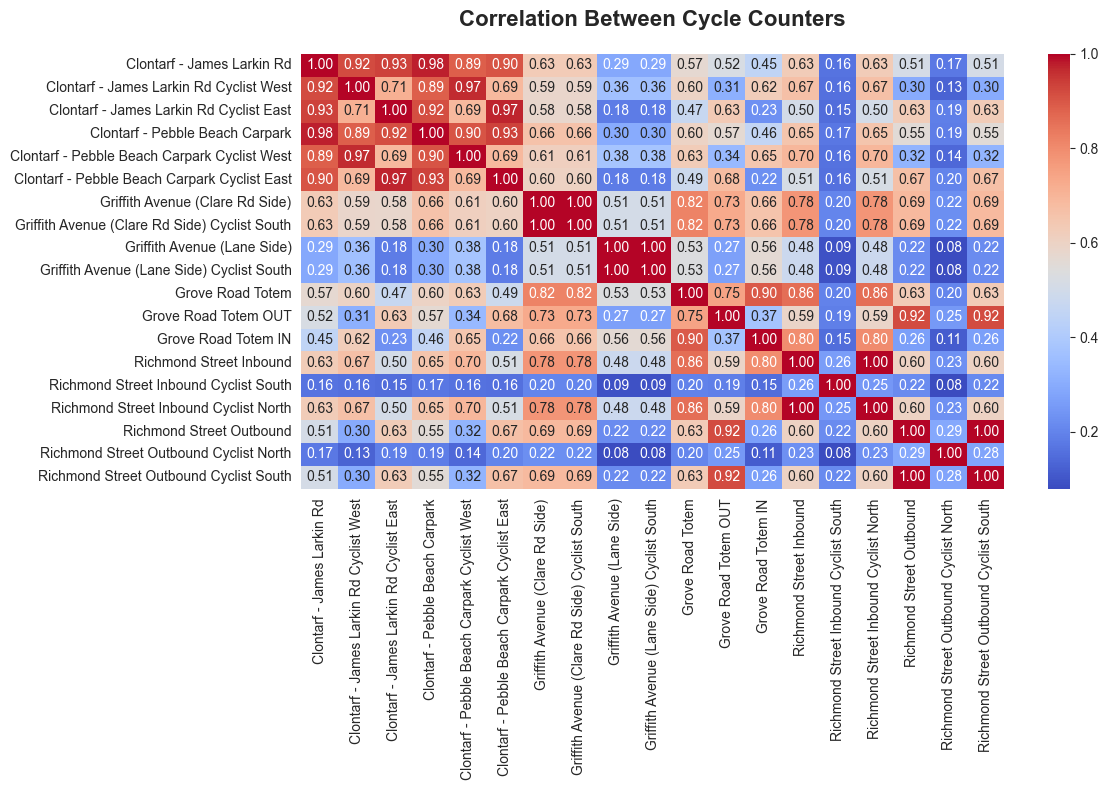

In [54]:
numeric_columns = cycle_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = cycle_data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Title
plt.title("Correlation Between Cycle Counters", fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

#### **Findings**
- The heatmap helps to identify the relationship between the locations, and to see the most important features.
 The correlation values of the columns range from -1 to 1.


- The locations close to each other have a high correlation, which is expected.
- Sometimes the same counter in different directions has a high correlation.
    - Example 1: Clontarf - James Larkin Rd is highly correlated with Clontarf - James Larkin Rd Cyclist West adn East
        - Over 0.9 of correlation.
    - Example 2: Richmond Street Inbound have a 1.0 correlation with Richmond Street Inbound Cyclist North.

- No correlation between different locations.
        - Example: Grove Road Totem and Richmond Street Inbound Cyclist North have a low correlation of 0.11, maybe because they are far from each other.


# Encoding and PCA
<a id="Encoding-and-PCA"></a>

## Label Encoding
<a id="Label-Encoding"></a>
- Label Encoding is used to convert categorical data into numerical data.
- The time_day column assumes numbers:
    - Morning: 0
    - Afternoon: 1
    - Evening: 2
    - Night: 3

- This method is used to standardize the data.
- And later used in the analysis.

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# apply to time_day
cycle_data['time_day_encoded'] = label_encoder.fit_transform(cycle_data['time_day'])

# See the encoded column
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

#See effects
cycle_data['time_day_encoded'].head()

0    3
1    3
2    3
3    3
4    3
Name: time_day_encoded, dtype: int64

In [56]:
# save cycle_data
cycle_data.head()

# export data_cycle
cycle_data.to_csv('cycle_data.csv', index=False)

- Just transformed the time_day column into a numerical column. For the analysis.

**Export EDA data**
- Drop columns that are not needed for the analysis.
- Example: Time, weekday, hour, Month, time_day_encoded, Richmond Street Outbound Cyclist North, Richmond Street Inbound Cyclist South
- And the exported data relevant for the PCA analysis.

**Drop Columns**

In [57]:
# export the data
columns_to_drop = ['Time', 'weekday',  'time_day_encoded', 'time_day',
                   'Richmond Street Outbound Cyclist North', 'Richmond Street Inbound Cyclist South']

# Drop the columns
cycle_data = cycle_data.drop(columns=columns_to_drop)

**Export the data**

In [58]:
# Export the adjusted dataset
cycle_data.to_csv('cycle_data_pca.csv', index=False)

**Import the data** cycle_data_pca

In [59]:
# import the data: cycle_data_PCA
cycle_data_pca = pd.read_csv('cycle_data_PCA.csv')

## Kurtosis
<a id="Kurtosis"></a>
- How peaked or flat the data is distributed.
- Values close to 0 show normal distribution.
- Positive means there are high values (outliers) > 3


In [60]:
kurtosis = cycle_data_pca.kurtosis().sort_values(ascending=False)
print(kurtosis)

Griffith Avenue (Lane Side)                      70.374915
Griffith Avenue (Lane Side) Cyclist South        70.374915
Grove Road Totem IN                              16.674523
Grove Road Totem OUT                              8.621218
Grove Road Totem                                  6.064810
Clontarf - Pebble Beach Carpark Cyclist East      5.480795
Richmond Street Outbound Cyclist South            4.340923
Richmond Street Outbound                          4.329288
Clontarf - James Larkin Rd Cyclist East           4.085732
Clontarf - Pebble Beach Carpark Cyclist West      3.574011
Clontarf - Pebble Beach Carpark                   3.381421
Griffith Avenue (Clare Rd Side) Cyclist South     2.942590
Griffith Avenue (Clare Rd Side)                   2.942590
Clontarf - James Larkin Rd Cyclist West           2.674166
Clontarf - James Larkin Rd                        2.469835
Richmond Street Inbound Cyclist North             2.257345
Richmond Street Inbound                           2.2302

## Skewness
<a id="Skewness"></a>

In [61]:
skewness = cycle_data_pca.skew().sort_values(ascending=False)

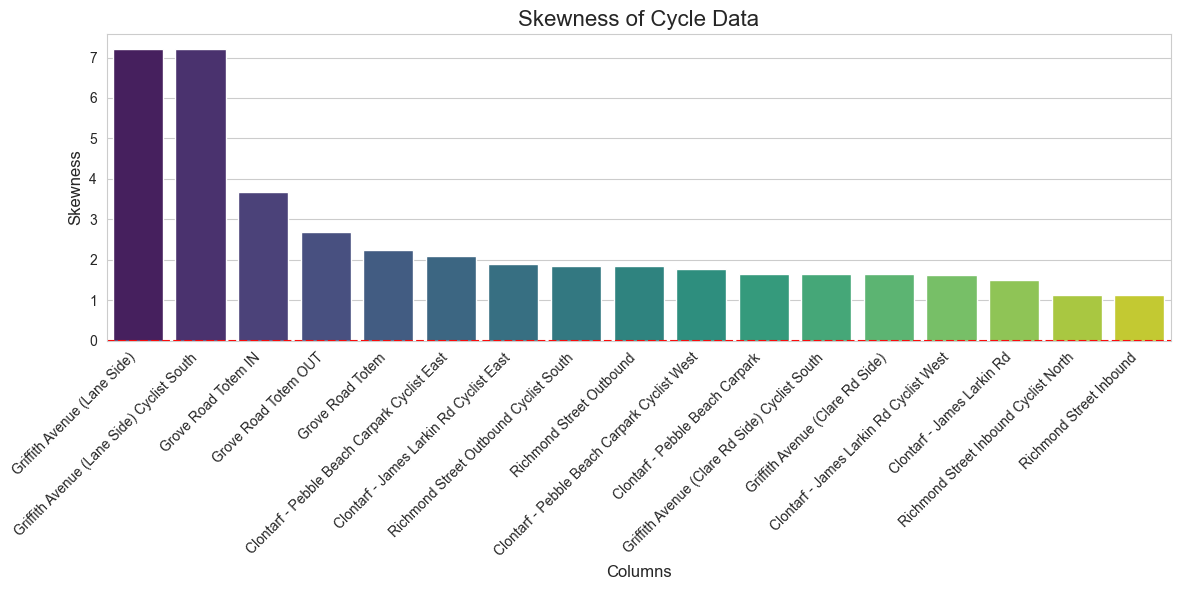

In [62]:
# Bar plot -> skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, hue=skewness.index, palette="viridis", legend=False)

# Add titles and labels
plt.title('Skewness of Cycle Data', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Skewness', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [63]:
print(skewness)

Griffith Avenue (Lane Side)                      7.210168
Griffith Avenue (Lane Side) Cyclist South        7.210168
Grove Road Totem IN                              3.676166
Grove Road Totem OUT                             2.695027
Grove Road Totem                                 2.231079
Clontarf - Pebble Beach Carpark Cyclist East     2.097164
Clontarf - James Larkin Rd Cyclist East          1.898957
Richmond Street Outbound Cyclist South           1.845758
Richmond Street Outbound                         1.842052
Clontarf - Pebble Beach Carpark Cyclist West     1.779147
Clontarf - Pebble Beach Carpark                  1.657578
Griffith Avenue (Clare Rd Side) Cyclist South    1.644112
Griffith Avenue (Clare Rd Side)                  1.644112
Clontarf - James Larkin Rd Cyclist West          1.614725
Clontarf - James Larkin Rd                       1.504798
Richmond Street Inbound Cyclist North            1.128024
Richmond Street Inbound                          1.121007
dtype: float64

**Findings**
  - **Griffith Avenue (Lane Side)** has the highest skewness value, 7.
 - The skewness values are positive, indicating that the data is right-skewed.
  - Columns like **Grove Road, Richmond Street Inbound** have skewness values between 2 and 3. Significant skewness, but lower than Griffith Avenue (Lane Side).
 - While columns like **Clontarf - Pebble Beach Carpark Cyclist West** have skewness values closer to 1.

**Checkin for zeros and negative** values in the dataset.
- To determine what transformation each column needs

In [64]:
# Calculate - zeros and negatives
numeric_columns = cycle_data_pca.select_dtypes(include=['float64', 'int64']).columns
zero_counts = [cycle_data_pca[col][cycle_data_pca[col] == 0].count() for col in numeric_columns]
negative_counts = [cycle_data_pca[col][cycle_data_pca[col] < 0].count() for col in numeric_columns]

- **For blue bars** -> Counts of Zeros
- **Red bars** -> for Negatives

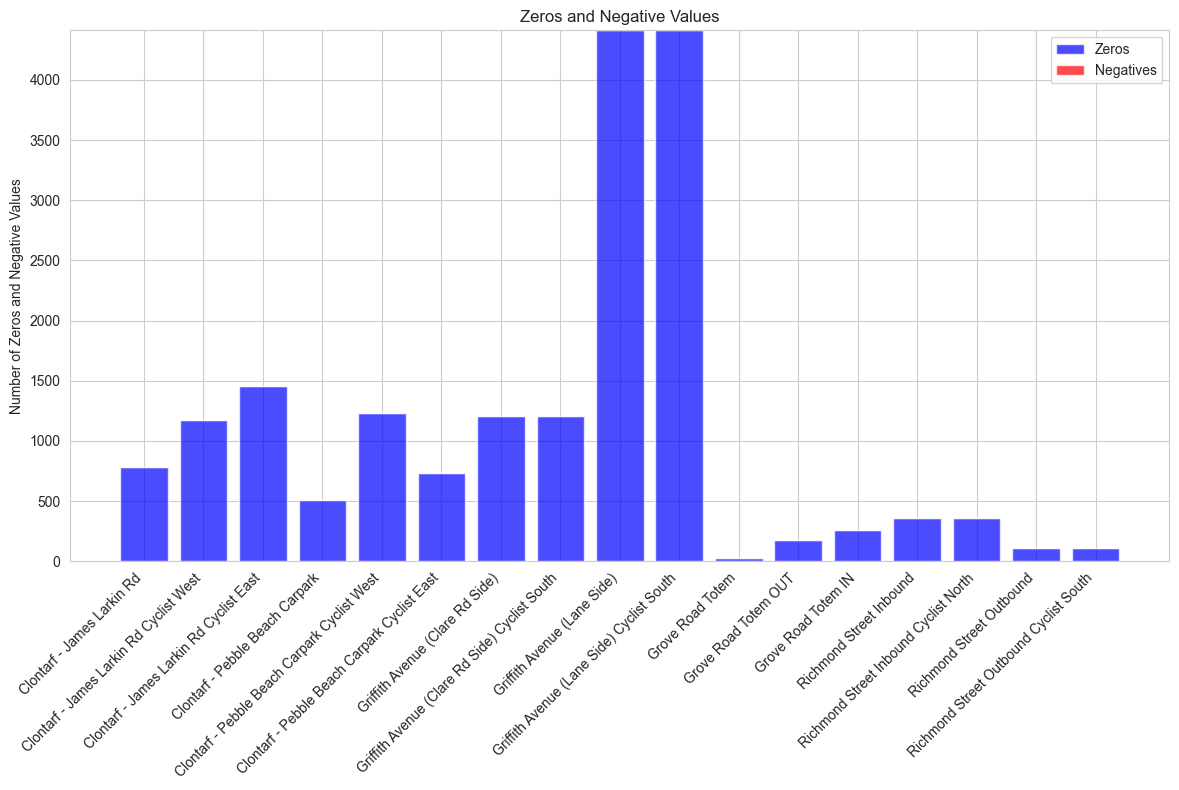

In [65]:
x = range(len(numeric_columns))
plt.figure(figsize=(12, 8))
plt.bar(x, zero_counts, label='Zeros', color='blue', alpha=0.7)
plt.bar(x, negative_counts, label='Negatives', color='red', alpha=0.7, bottom=zero_counts)
plt.xticks(x, numeric_columns, rotation=45, ha='right')
plt.ylabel('Number of Zeros and Negative Values')
plt.title('Zeros and Negative Values')
plt.legend()
plt.tight_layout()
plt.show()

**Columns dominated by zeros**
- Griffith Avenue (Lane Side) Cyclist South
- Griffith Avenue (Lane Side)
- Richmond Street Inbound Cyclist South
- Richmond Street Outbound Cyclist North


- Attention to Griffith Avenue (Lane Side) and Griffith Avenue (Lane Side) Cyclist South with over 70.

### Handling Skewness 
<a id="Handling-Skewness"></a>

1. PCA is sensitive to the distribution of the data.
- Data needs to be normally distributed.

2. There are different methods to handle skewness, since they have different levels of skewness.
- **Moderate:** skewness values between 1 and 2.
- **High:** skewness values above 2.

In [66]:
# Divide categories
moderate_skew = skewness[(skewness > 1) & (skewness < 2)].index
high_skew = skewness[(skewness > 2)].index

print("Moderate Skewness:", moderate_skew)
print("High Skewness:", high_skew)

Moderate Skewness: Index(['Clontarf - James Larkin Rd Cyclist East',
       'Richmond Street Outbound Cyclist South', 'Richmond Street Outbound',
       'Clontarf - Pebble Beach Carpark Cyclist West',
       'Clontarf - Pebble Beach Carpark',
       'Griffith Avenue (Clare Rd Side) Cyclist South',
       'Griffith Avenue (Clare Rd Side)',
       'Clontarf - James Larkin Rd Cyclist West', 'Clontarf - James Larkin Rd',
       'Richmond Street Inbound Cyclist North', 'Richmond Street Inbound'],
      dtype='object')
High Skewness: Index(['Griffith Avenue (Lane Side)',
       'Griffith Avenue (Lane Side) Cyclist South', 'Grove Road Totem IN',
       'Grove Road Totem OUT', 'Grove Road Totem',
       'Clontarf - Pebble Beach Carpark Cyclist East'],
      dtype='object')


#### Moderate Skewness with Box-Cox

In [67]:
from scipy.stats import boxcox

for col in moderate_skew:
    if (cycle_data_pca[col] <= 0).any(): #no negative value
        cycle_data_pca[col] += 1
    cycle_data_pca[col], _ = boxcox(cycle_data_pca[col])

In [68]:
new_skewness = cycle_data_pca[moderate_skew].skew().sort_values(ascending=False)
print("Skewness after Box-Cox:\n", new_skewness)

Skewness after Box-Cox:
 Clontarf - James Larkin Rd Cyclist East         -0.043942
Clontarf - James Larkin Rd Cyclist West         -0.053864
Griffith Avenue (Clare Rd Side)                 -0.058343
Griffith Avenue (Clare Rd Side) Cyclist South   -0.058343
Clontarf - Pebble Beach Carpark Cyclist West    -0.070407
Richmond Street Outbound Cyclist South          -0.072665
Richmond Street Outbound                        -0.072812
Clontarf - James Larkin Rd                      -0.107735
Clontarf - Pebble Beach Carpark                 -0.112434
Richmond Street Inbound Cyclist North           -0.213704
Richmond Street Inbound                         -0.214081
dtype: float64


#### High Skewness with Yeo-Johnson


In [69]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson
transformer = PowerTransformer(method='yeo-johnson')
cycle_data_pca[high_skew] = transformer.fit_transform(cycle_data_pca[high_skew])

In [70]:
# See difference
new_skewness = cycle_data_pca[high_skew].skew().sort_values(ascending=False)
print("Skewness after Yeo-Johnson:\n", new_skewness)

Skewness after Yeo-Johnson:
 Griffith Avenue (Lane Side)                     0.397730
Griffith Avenue (Lane Side) Cyclist South       0.397730
Grove Road Totem OUT                           -0.019267
Grove Road Totem IN                            -0.025827
Grove Road Totem                               -0.047804
Clontarf - Pebble Beach Carpark Cyclist East   -0.051628
dtype: float64


**Findings**
- The skewness values are now closer to 0, indicating that the data is more normally distributed.
- The Box-Cox and Yeo-Johnson transformations helped to reduce the skewness of the data.


In [71]:
# Calculate skewness and kurtosis
skewness = cycle_data_pca[numeric_columns].skew()
kurtosis_values = cycle_data_pca[numeric_columns].kurt()

# Combine the 2 together
distribution_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis_values
}).sort_values(by='Skewness', ascending=False)

In [72]:
from IPython.display import display
import matplotlib.pyplot as plt

# Nice table to see them
styled_table = distribution_stats.style.background_gradient(cmap='coolwarm') \
    .format({'Skewness': '{:.2f}', 'Kurtosis': '{:.2f}'}) \
    .set_caption('Distribution of Skewness and Kurtosis')

display(styled_table)

,Skewness,Kurtosis
Griffith Avenue (Lane Side),0.40,-1.51
Griffith Avenue (Lane Side) Cyclist South,0.40,-1.51
Grove Road Totem OUT,-0.02,-0.18
Grove Road Totem IN,-0.03,-0.13
Clontarf - James Larkin Rd Cyclist East,-0.04,-1.18
Grove Road Totem,-0.05,-0.40
Clontarf - Pebble Beach Carpark Cyclist East,-0.05,-0.96
Clontarf - James Larkin Rd Cyclist West,-0.05,-1.19
Griffith Avenue (Clare Rd Side) Cyclist South,-0.06,-0.93
Griffith Avenue (Clare Rd Side),-0.06,-0.93


**The ideal:**

- Values > -1 Skewness < 1
- Values > -3 Kurtosis < 3

In [73]:
# Export the data
cycle_data_pca.to_csv('cycle_data_pca.csv', index=False)

## Distribution Histogram
<a id="Distribution-Histogram"></a>

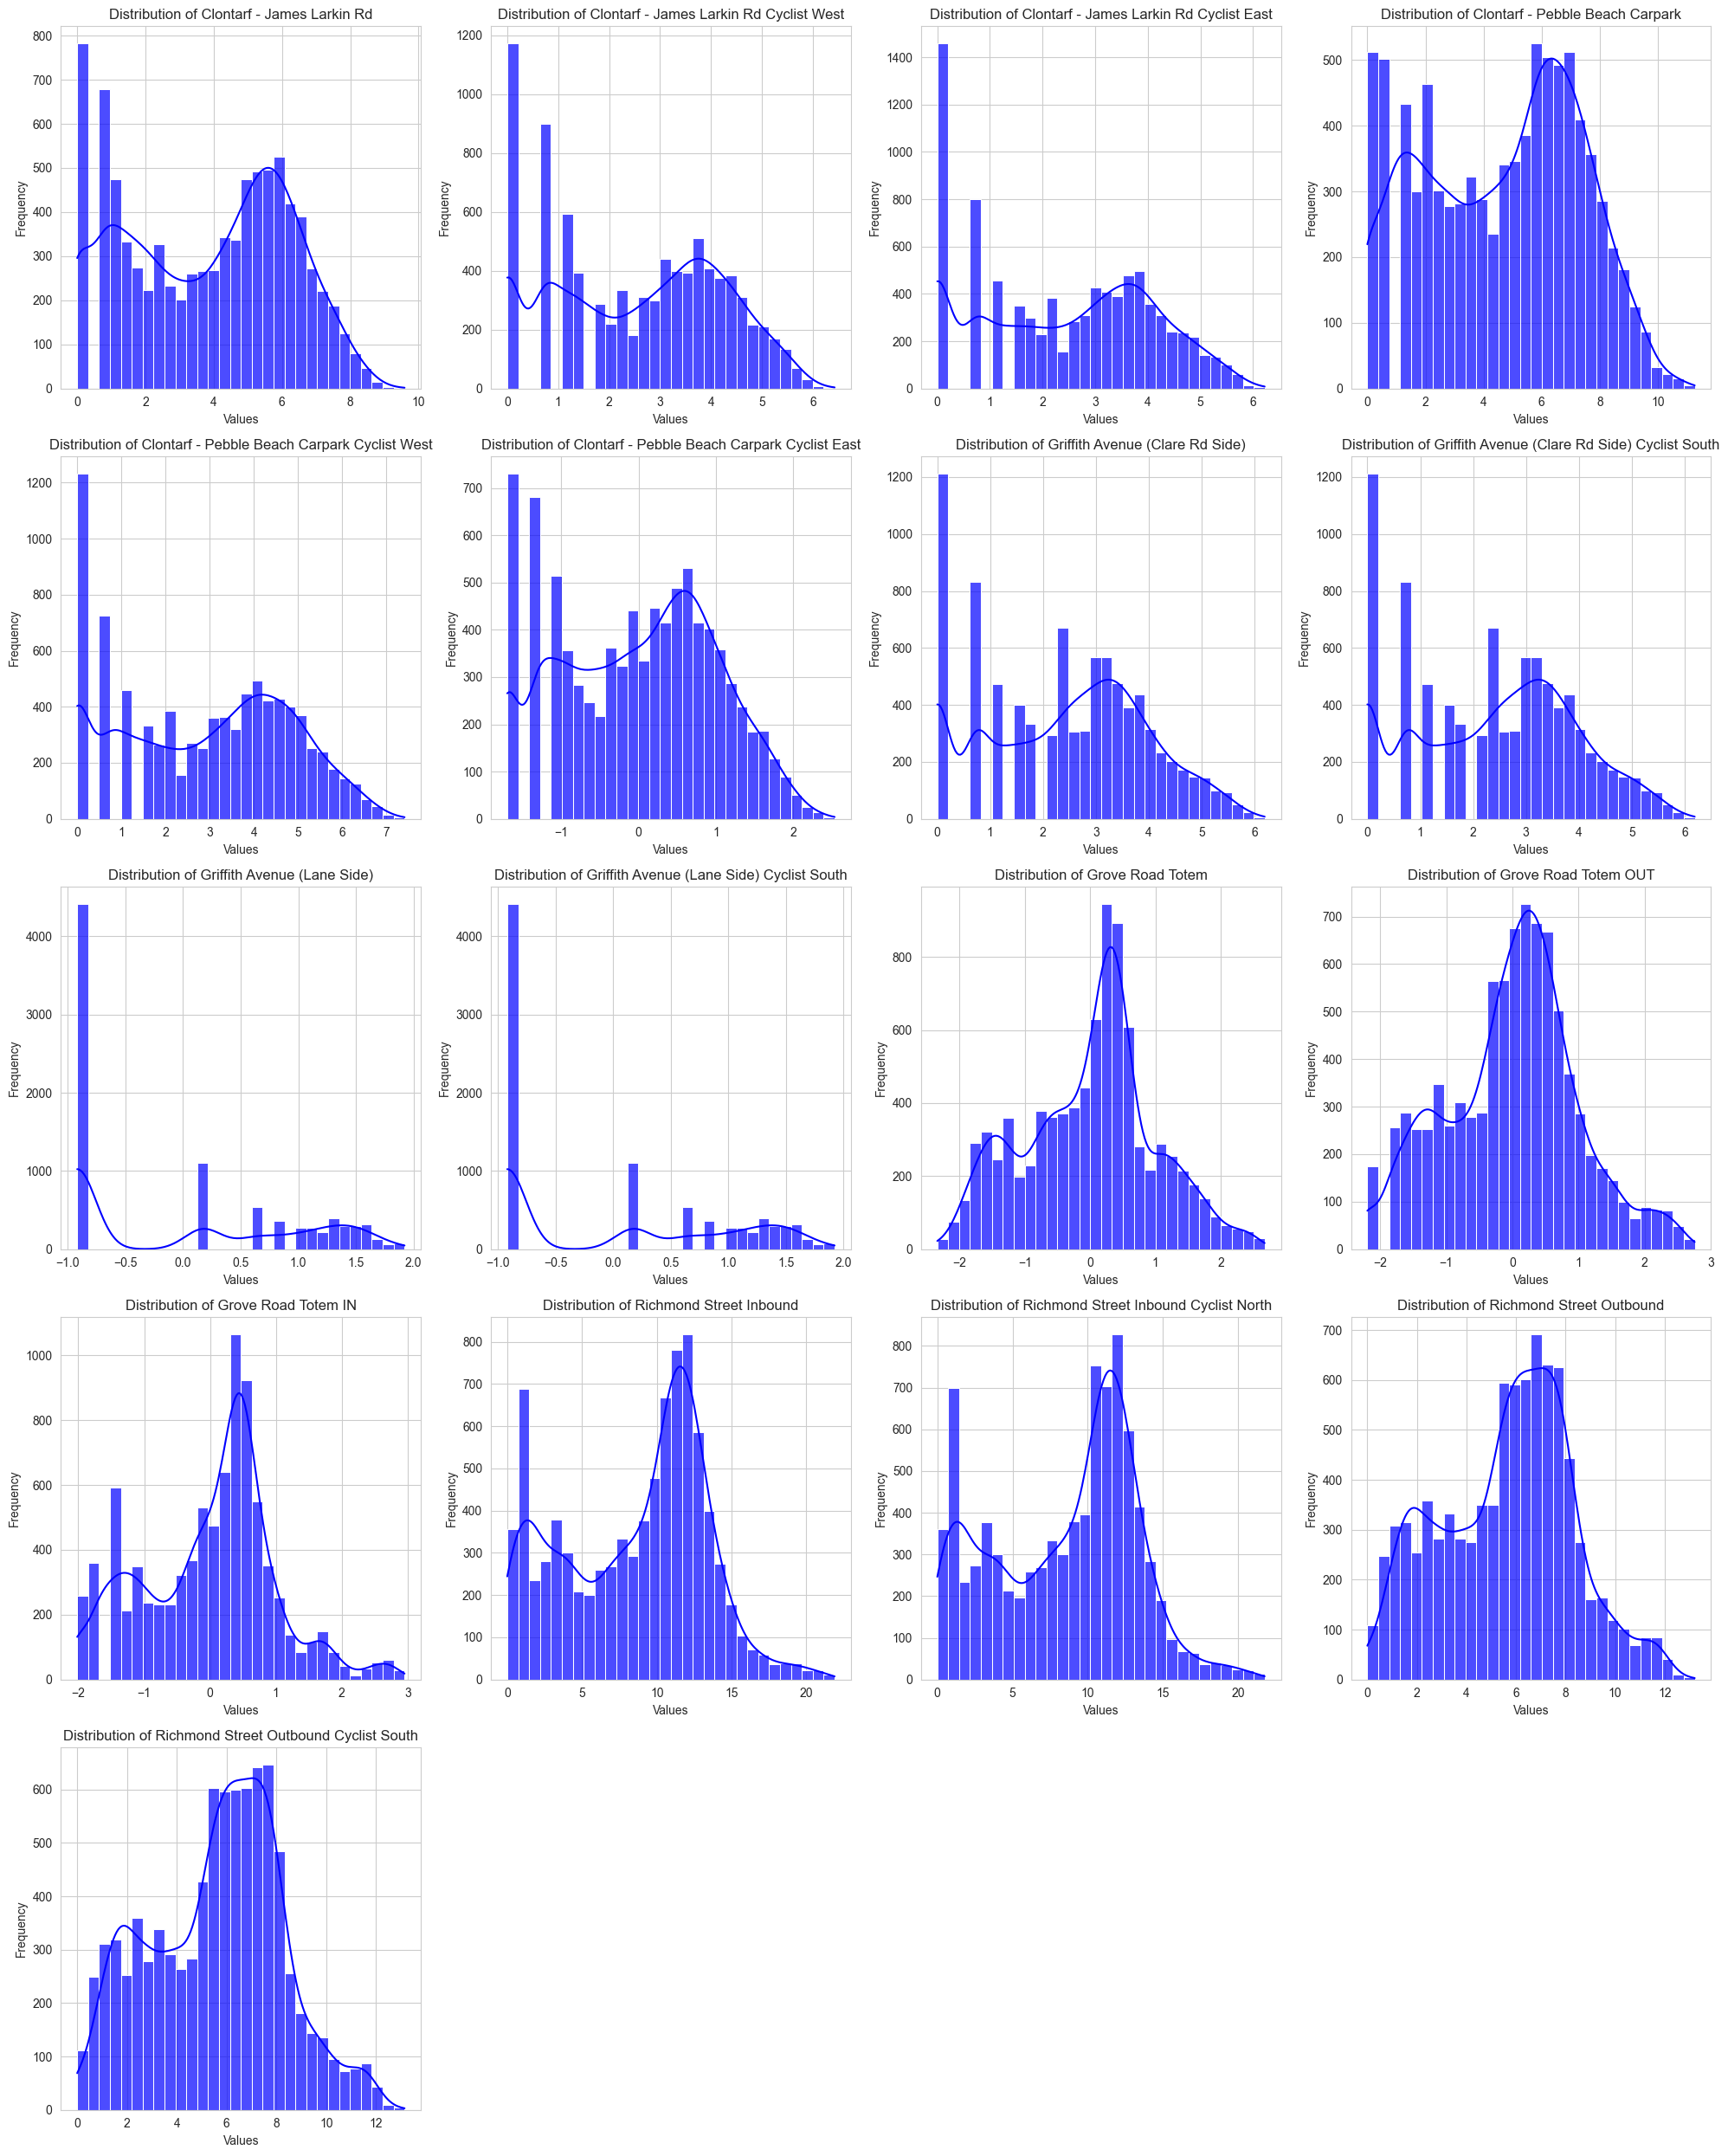

In [74]:
# No. Rows and columns for the subplots
n_cols = 4
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
# Grid size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(cycle_data_pca[col], bins=30, kde=True, ax=axes[i], color='blue', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Unused subplots - do not remove
for j in range(i + 1, len(axes)):
    axes[j].axis('off') # hide the subplots empty

plt.tight_layout()
plt.show()

## Standardization
<a id="Standardization"></a>

- Make the dataset have the Standard Deviation of 1.
- To confirm each column contributes equally to the PCA Analysis
- Using the StandardScaler from Scikit-Learn to standardize the data.

In [75]:
# import the StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the StandardScaler
scaler = StandardScaler()

# apply to the data
cycle_data_pca_scaled = scaler.fit_transform(cycle_data_pca)

# convert back to DataFrame
cycle_data_pca_scaled = pd.DataFrame(cycle_data_pca_scaled, columns=cycle_data_pca.columns)

# See the scaled data
cycle_data_pca_scaled.head()

#export the data
cycle_data_pca_scaled.to_csv('cycle_data_pca_scaled.csv', index=False)

**See the difference**


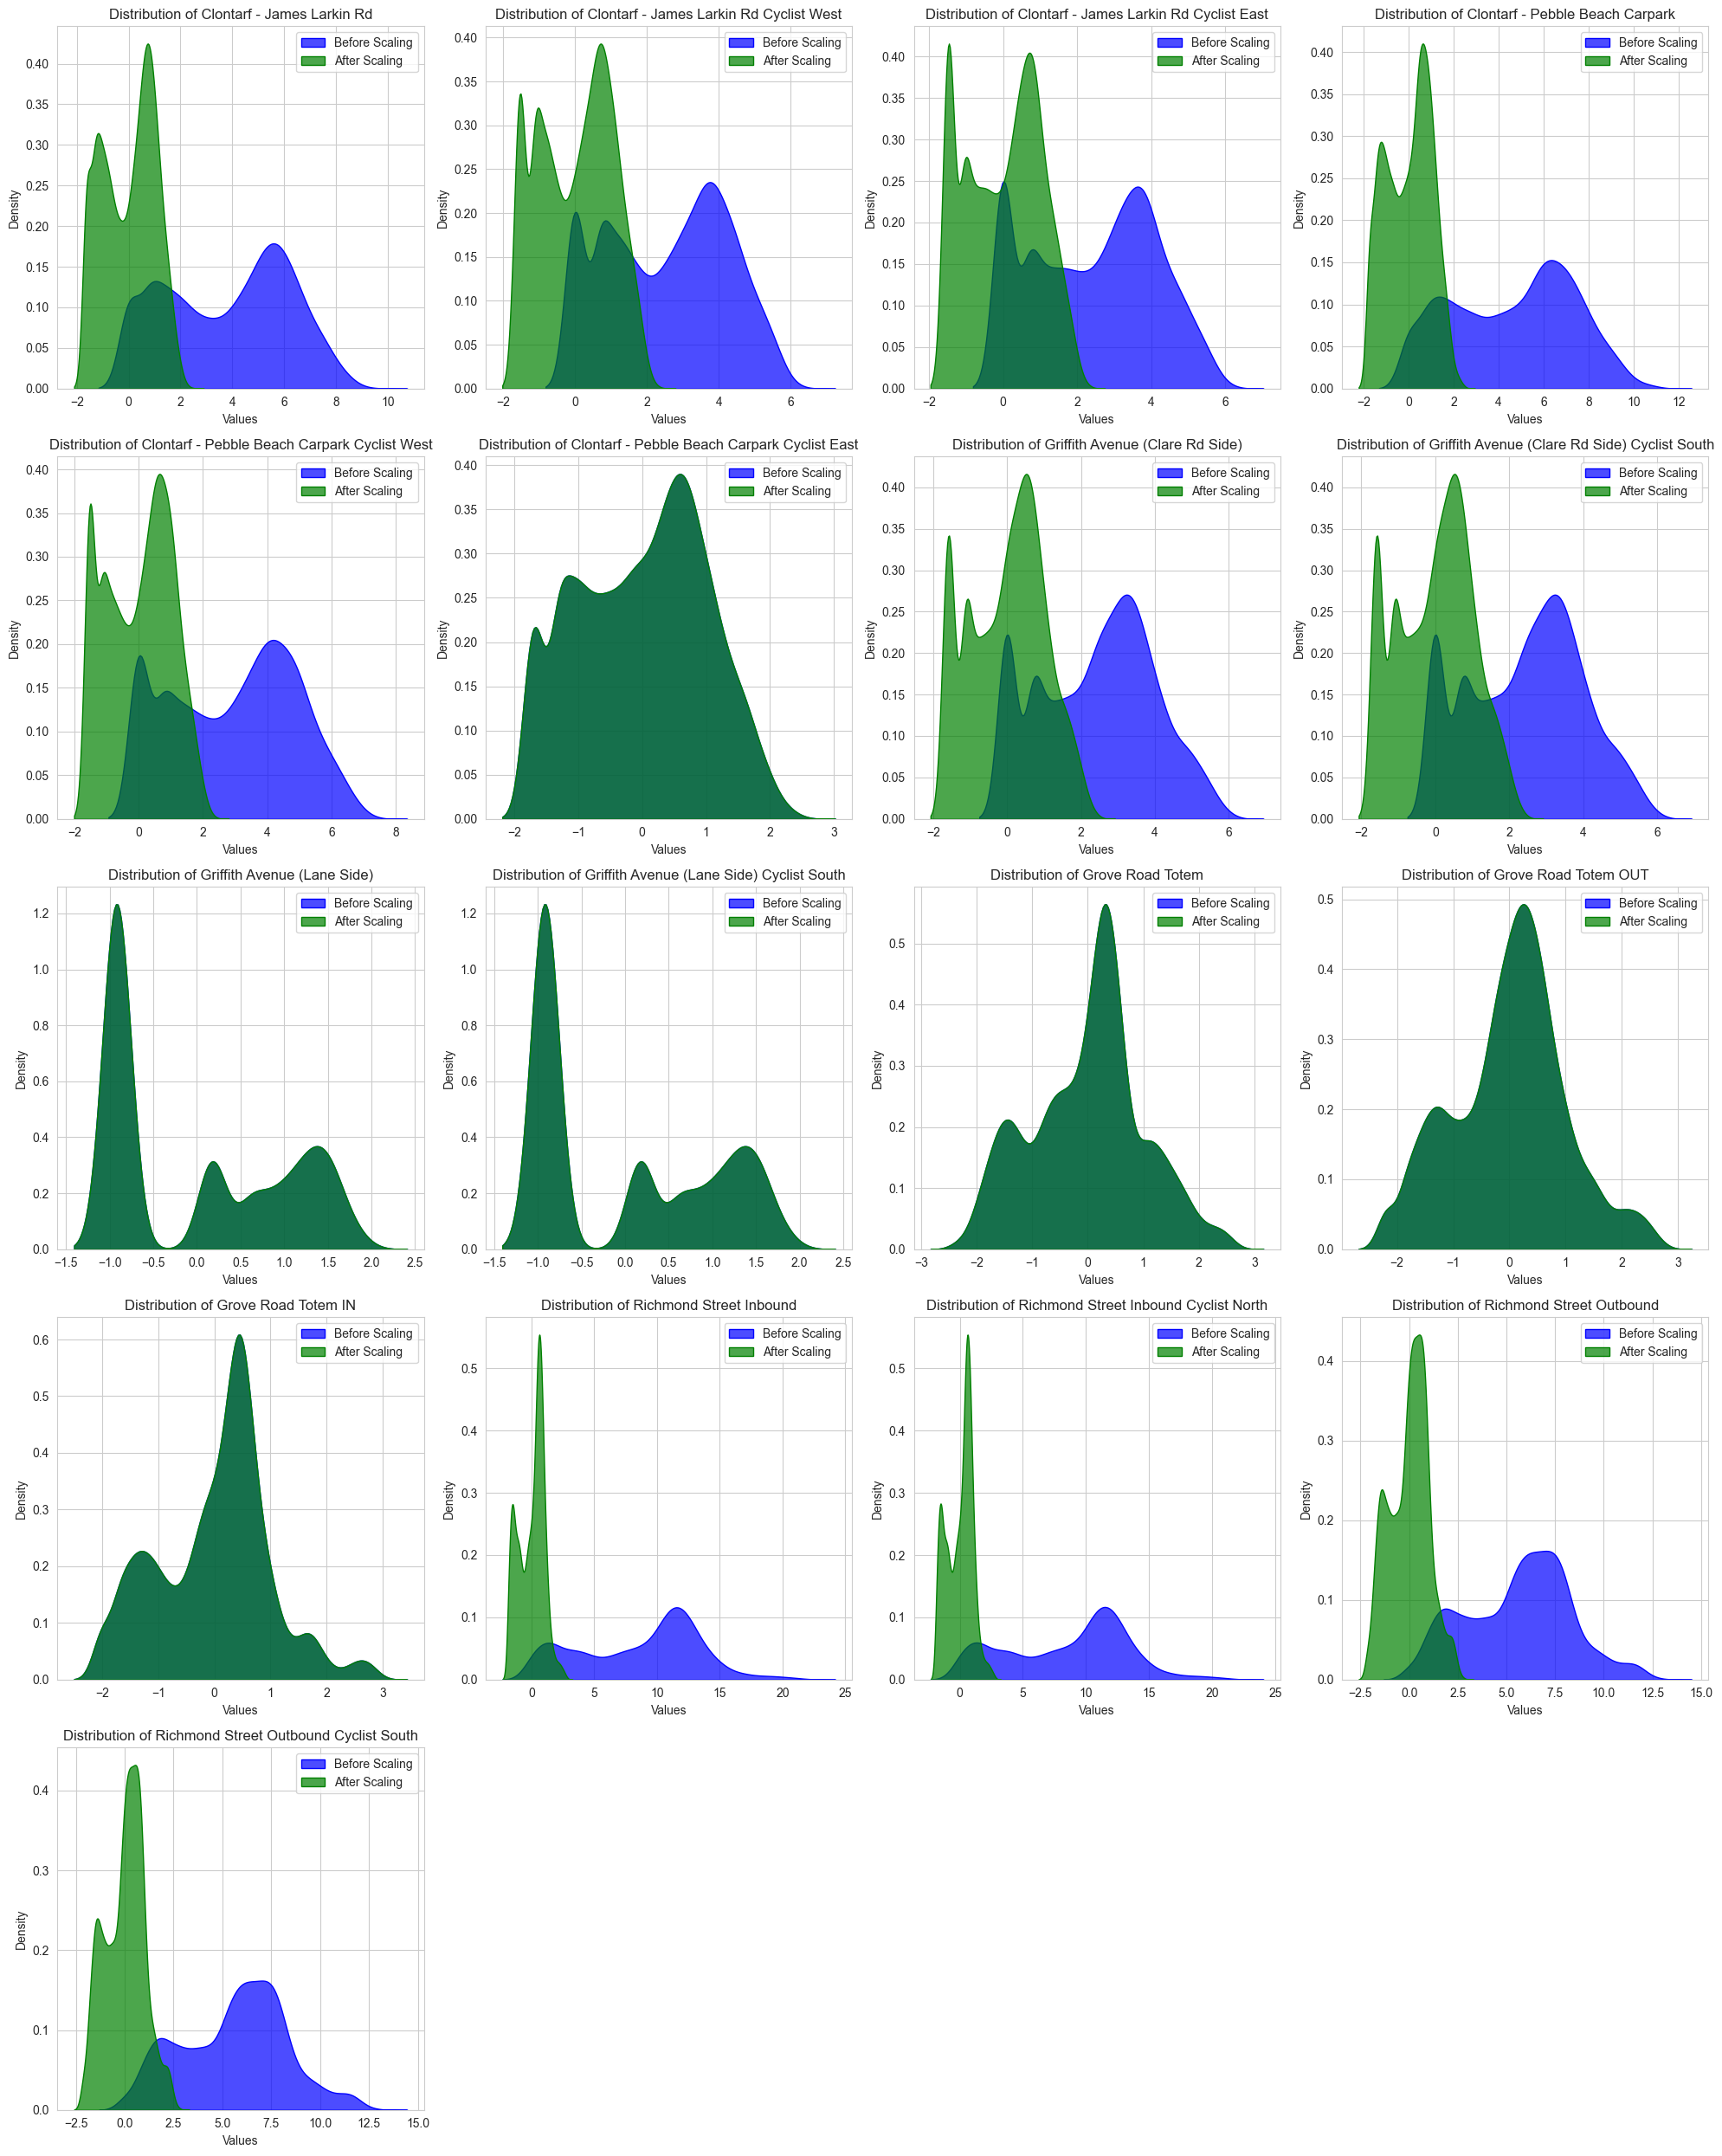

In [76]:
n_cols = 4 
n_rows = (len(cycle_data_pca.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(cycle_data_pca.columns):
    sns.kdeplot(cycle_data_pca[col], label='Before Scaling', fill=True, color='blue', ax=axes[i], alpha=0.7)
    sns.kdeplot(cycle_data_pca_scaled[col], label='After Scaling', fill=True, color='green', ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# hide the empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Findings**
- The data is now standardized, with a mean of 0 and a standard deviation of 1.
- The distributions of the columns are now more similar, which is important for the PCA analysis.

In [77]:
# see distribution
cycle_data_pca_scaled.describe()

,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist West,Clontarf - James Larkin Rd Cyclist East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist West,Clontarf - Pebble Beach Carpark Cyclist East,Griffith Avenue (Clare Rd Side),Griffith Avenue (Clare Rd Side) Cyclist South,Griffith Avenue (Lane Side),Griffith Avenue (Lane Side) Cyclist South,Grove Road Totem,Grove Road Totem OUT,Grove Road Totem IN,Richmond Street Inbound,Richmond Street Inbound Cyclist North,Richmond Street Outbound,Richmond Street Outbound Cyclist South
count,8759.000000,8.759000e+03,8759.000000,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03,8.759000e+03
mean,0.000000,-1.784672e-16,0.000000,1.752223e-16,-8.436630e-17,-4.542801e-17,-1.525083e-16,-1.525083e-16,-2.595886e-17,-2.595886e-17,1.622429e-17,-3.244858e-17,-3.244858e-18,-3.179961e-16,6.814201e-17,6.489716e-18,-9.085602e-17
std,1.000057,1.000057e+00,1.000057,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,-1.616034,-1.530765e+00,-1.471788,-1.729025e+00,-1.522461e+00,-1.699607e+00,-1.583424e+00,-1.583424e+00,-9.187342e-01,-9.187342e-01,-2.340966e+00,-2.193597e+00,-2.016177e+00,-1.799789e+00,-1.797565e+00,-2.100230e+00,-2.097343e+00
25%,-0.959179,-8.366129e-01,-1.043703,-9.345620e-01,-9.133983e-01,-8.839040e-01,-8.051498e-01,-8.051498e-01,-9.187342e-01,-9.187342e-01,-6.955015e-01,-6.592546e-01,-7.335068e-01,-8.990115e-01,-8.941737e-01,-7.985306e-01,-7.923301e-01
50%,0.151586,8.680076e-02,0.112614,1.399646e-01,1.371385e-01,6.887975e-02,1.169213e-01,1.169213e-01,-9.187342e-01,-9.187342e-01,1.460415e-01,8.123904e-02,1.859471e-01,2.575016e-01,2.634267e-01,1.308282e-01,1.115227e-01
75%,0.820127,8.273372e-01,0.814392,8.046933e-01,7.997334e-01,7.641561e-01,7.266724e-01,7.266724e-01,1.025831e+00,1.025831e+00,5.615263e-01,6.047092e-01,5.789595e-01,7.351562e-01,7.331952e-01,6.912378e-01,6.976543e-01
max,2.418486,2.314040e+00,2.267826,2.465405e+00,2.322639e+00,2.535775e+00,2.439028e+00,2.439028e+00,1.921693e+00,1.921693e+00,2.673517e+00,2.757498e+00,2.951724e+00,2.784309e+00,2.780882e+00,2.830013e+00,2.827287e+00


---

## PCA - Principal Component Analysis
<a id="PCA"></a>
- **Why PCA?**
    - To reduce the dimensionality of the data.
    - To identify the most important features.
    - To improve the model performance.
        
- **In practice, PCA is used to reduce the number of features in the dataset.**

- **Steps:**
    - Apply PCA to the scaled data.
    - Fit the PCA model to the data.
    - Transform the data to the principal components.
        

In [78]:
from sklearn.decomposition import PCA

# instantiate the PCA
pca = PCA()

# apply to the scaled data
cycle_data_pca_transformed = pca.fit_transform(cycle_data_pca_scaled)

# convert back to DataFrame
cycle_data_pca_transformed = pd.DataFrame(
    cycle_data_pca_transformed, 
    columns=[f'PC{i}' for i in range(1, cycle_data_pca_scaled.shape[1] + 1)])

# See the transformed data
cycle_data_pca_transformed.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-4.867384,-0.226024,-0.220006,-0.146450,-0.333088,0.418857,0.373743,0.027551,0.576424,-0.022147,-0.032051,-0.029155,0.008438,0.004127,0.002608,2.689934e-16,-6.655192e-16
1,-4.347233,-0.266720,-0.474535,-0.109982,1.128863,0.310794,0.796396,-0.003194,-0.600048,0.315526,0.030796,-0.056667,-0.054051,0.002848,0.001193,-7.826028e-16,9.597254e-16
2,-5.118246,-0.207867,0.462154,-0.072686,0.256936,-0.088743,-0.117083,-0.285114,0.358483,-0.208171,-0.026827,-0.008357,-0.066521,0.004403,0.002793,-1.192400e-15,1.573650e-15
3,-4.836265,-0.218385,0.577475,0.413535,0.877764,-0.188012,0.377146,-0.112277,-0.380205,-0.056105,-0.061630,-0.008414,0.044560,0.003660,-0.058245,3.528187e-15,-1.804723e-14
4,-4.988295,-0.189310,0.541077,0.414714,0.769918,0.152786,-0.257276,0.462806,0.049901,-0.049940,-0.052026,0.047226,-0.043370,0.003925,0.002922,-9.331853e-16,1.973872e-15


### Explained Variance Ratio
<a id="Explained-Variance-Ratio"></a>
- Here the PCA show what components explain the variance in the data.
- And the cumulative variance of the components shows how much of the variance is explained by the components.

Instead of using 17 columns, 2 components can explain the variance in the data because they represent the most important features.

In [79]:
# See the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# table to show the explained variance ratio
explained_variance_table = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': cumulative_variance
})

explained_variance_table

,Principal Component,Explained Variance Ratio,Cumulative Variance
0,1,0.771376,0.771376
1,2,0.083814,0.855190
2,3,0.068725,0.923915
3,4,0.035712,0.959627
4,5,0.014765,0.974392
5,6,0.009938,0.984329
6,7,0.006248,0.990577
7,8,0.003815,0.994392
8,9,0.003565,0.997957
9,10,0.001596,0.999553


### Optimal Number of Components
<a id="Optimal-Number-of-Components"></a>

- Choose the number of components that explain the variance in the data.
- The threshold is 90% to reduce the dimensionality.

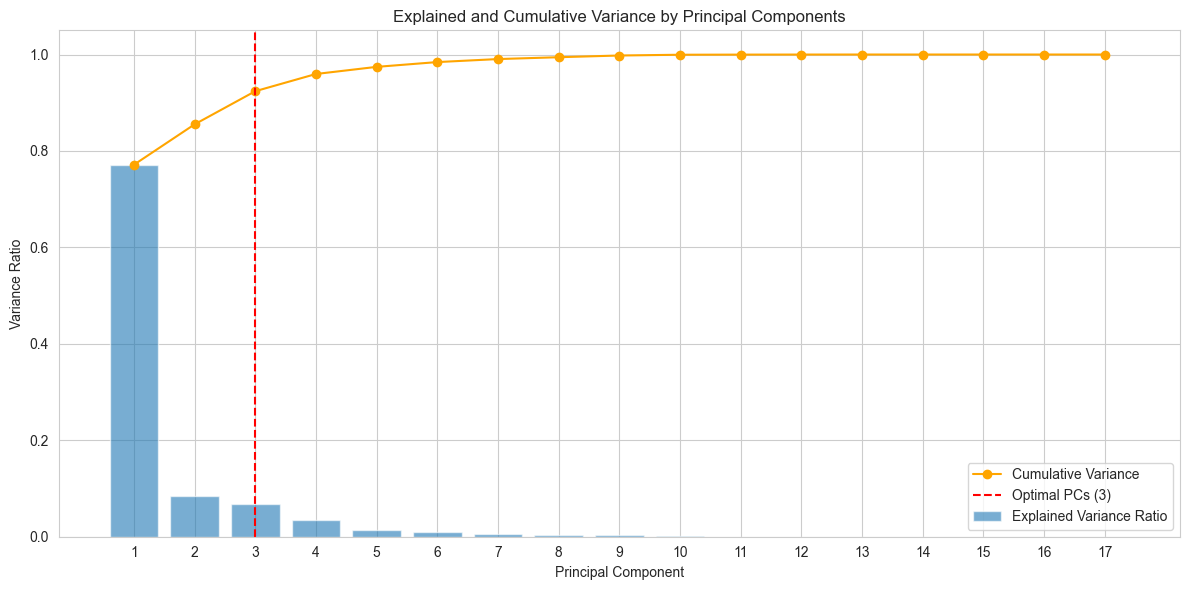

In [80]:
# the threshold to reach is 90% to reduce the dimensionality
threshold = 0.90
optimal_components = np.argmax(cumulative_variance >= threshold) + 1

# Graph
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, align='center', label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange', label='Cumulative Variance')
plt.axvline(x=optimal_components, color='red', linestyle='--', label=f'Optimal PCs ({optimal_components})')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Explained and Cumulative Variance by Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

**The output shows that:**
-   PC1 explains **77.14%** of the variance in the data.
-   PC2 explains **8.38%** of the variance in the data.
-   PC3 explains **6.87%** of the variance in the data.

-   Reducing the dimensionality of the data to 3 components explains > 90% of the variance in the data.
-   Out of 17 columns, only 3 components are needed to explain the variance in the data.

In [81]:
# select the first 3 components
reduced_data = cycle_data_pca_transformed.iloc[:, :3]

#then export the data
reduced_data.to_csv('cycle_data_reduced.csv', index=False)

### Clustering
<a id="Clustering"></a>

- **Why Clustering?**
- To group the data points into clusters based on their similarity.
- To identify patterns in the data.
- To improve the model performance.

### K-Means Clustering
- Uses the Euclidean distance to group the data points into clusters.
- Device the data into K clusters. Or set of data points that are similar to each other.

In [82]:
from sklearn.cluster import KMeans

# use 3 components for clustering
reduced_data = pd.read_csv('cycle_data_reduced.csv')
reduced_data = reduced_data.iloc[:, :3]

# instantiate the KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# fit + predict together
reduced_data['Cluster'] = kmeans.fit_predict(reduced_data)

print(reduced_data.head(10))

        PC1       PC2       PC3  Cluster
0 -4.867384 -0.226024 -0.220006        1
1 -4.347233 -0.266720 -0.474535        1
2 -5.118246 -0.207867  0.462154        1
3 -4.836265 -0.218385  0.577475        1
4 -4.988295 -0.189310  0.541077        1
5 -4.977946 -0.257591 -0.394737        1
6 -4.576239 -0.174802 -0.419880        1
7 -4.974831 -0.124244 -0.285896        1
8 -3.410671 -0.491062 -0.751869        1
9 -1.853582 -0.741216 -2.241387        2


**Findings**
- The data points are now grouped into 3 clusters based on their similarity.
- Example: The first 9 data points are in Cluster 1.


#### Visualising the Clusters
<a id="Visualising-the-Clusters"></a>


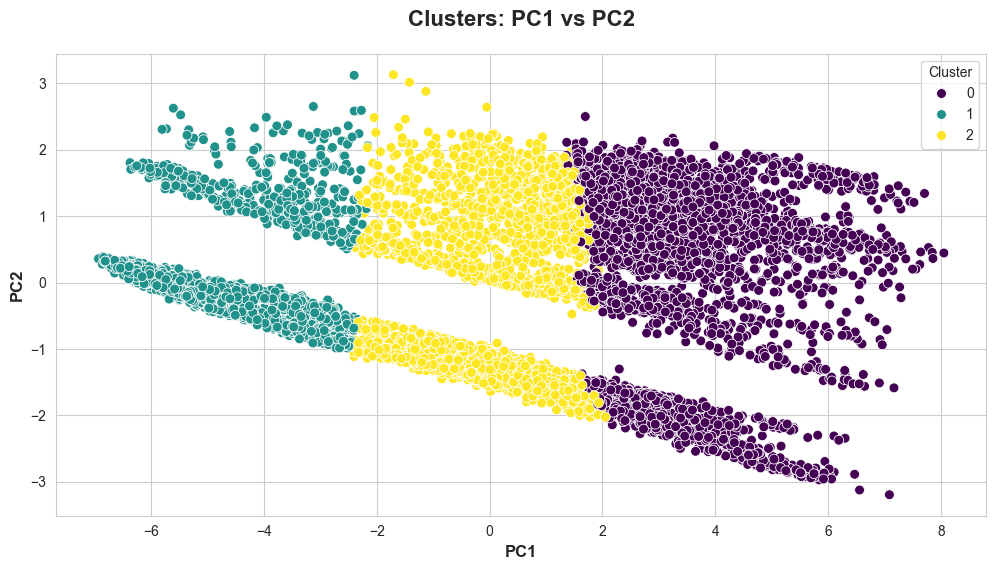

In [83]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=reduced_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50)
plt.title('Clusters: PC1 vs PC2', fontsize=16, weight='bold', pad=20)
plt.xlabel('PC1', fontsize=12, fontweight='bold')
plt.ylabel('PC2', fontsize=12 , fontweight='bold')
plt.legend(title='Cluster', fontsize=10)
plt.show()

**Findings**
- The scatter plot shows the clusters based on the first two principal components.
- Since the clusters can identified by colors:
    - Cluster 0: Purple
    - Cluster 1: Green
    - Cluster 2: Yellow
---

- The K-Means algorithm worked well to group the data points into clusters based on their similarity.
- The separation is clear, indicates different patterns in the data. 
    - Example: how cyclists behave during the day or during the week.

 ## Important Columns by Cluster
<a id="Important-Columns-by-Cluster"></a>
- Identify the columns that are important for each cluster.

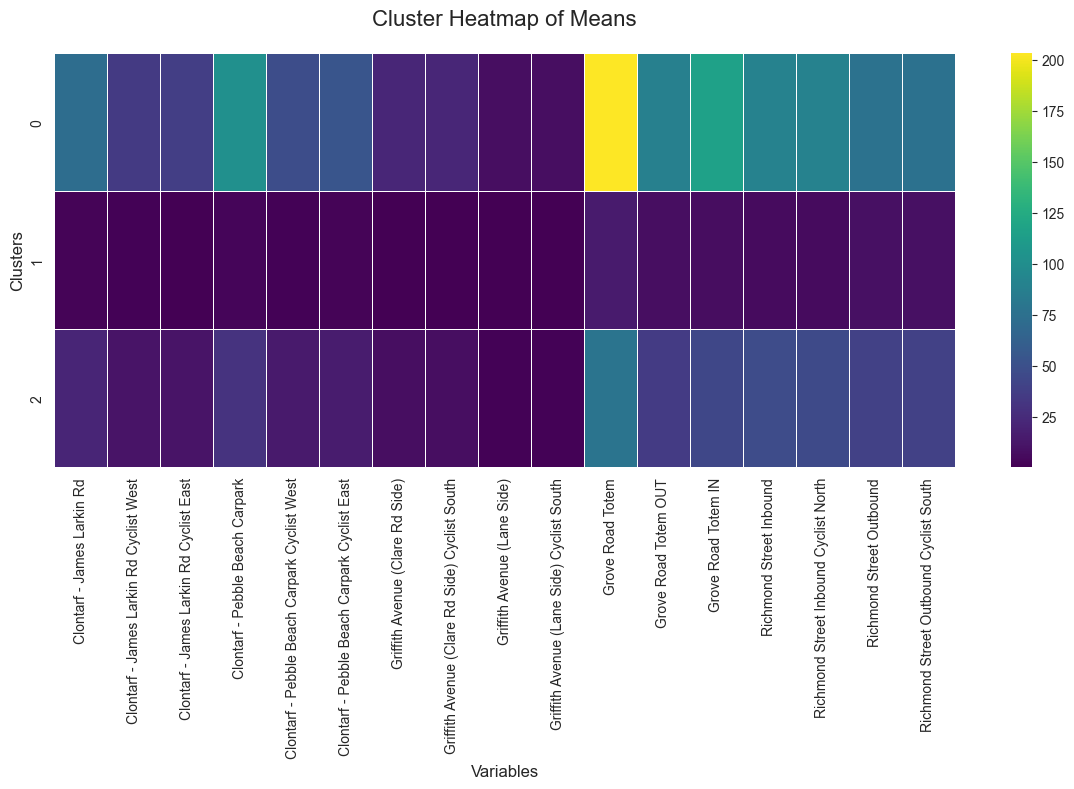

In [84]:
# Add cluster assignments to cycle_data
cycle_data['Cluster'] = reduced_data['Cluster']

# Select only numeric columns before grouping
numeric_columns = cycle_data.select_dtypes(include=['float64', 'int64']).columns
cluster_summary = cycle_data.groupby('Cluster')[numeric_columns].mean() 

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=False, cmap='viridis', linewidths=0.5, cbar=True)

# Add titles and labels
plt.title("Cluster Heatmap of Means", fontsize=16, pad=20)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Clusters", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [85]:
# group by cluster and calculate the mean of the columns
cluster_means = cycle_data.groupby('Cluster')[[
    'Grove Road Totem',
    'Grove Road Totem IN',
    'Grove Road Totem OUT',
    'Richmond Street Outbound Cyclist South', 
    'Richmond Street Outbound', 
    'Richmond Street Inbound Cyclist North', 
    'Richmond Street Inbound', 
    'Clontarf - Pebble Beach Carpark', 
    'Clontarf - James Larkin Rd'
]].mean()

- The columns that are important for the analysis are the ones that have the highest values in the clusters.

In [86]:
# clusters with the highest values
important_variables = [
    'Grove Road Totem',
    'Grove Road Totem IN',
    'Grove Road Totem OUT',
    'Richmond Street Outbound Cyclist South', 
    'Richmond Street Outbound', 
    'Richmond Street Inbound Cyclist North', 
    'Richmond Street Inbound', 
    'Clontarf - Pebble Beach Carpark', 
    'Clontarf - James Larkin Rd'
]

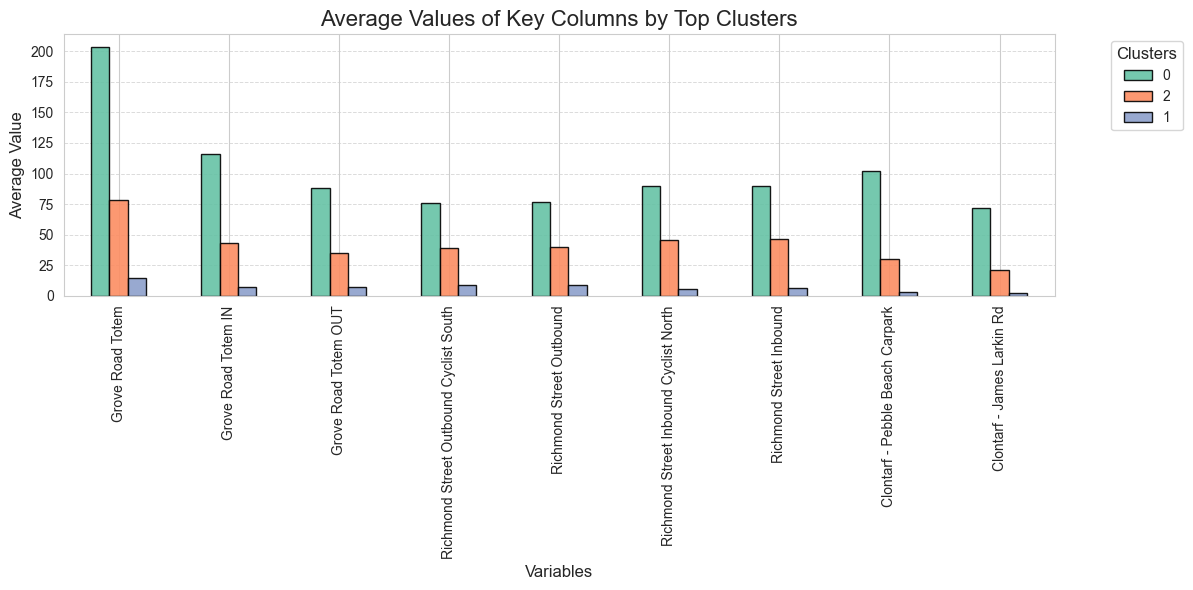

In [87]:
# mean of the clusters more important
important_clusters_indices = cluster_means.mean(axis=1).nlargest(5).index

# Filter the data for the most important clusters
important_clusters_data = cluster_means.loc[important_clusters_indices]

# graph: more important columns
palette = sns.color_palette("Set2", len(important_variables))

important_clusters_data.T.plot(
    kind='bar', 
    figsize=(12, 6), 
    color=palette, 
    edgecolor='black', 
    alpha=0.9
)
plt.title('Average Values of Key Columns by Top Clusters', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(
    title='Clusters', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    fontsize=10, 
    title_fontsize=12
)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

- Clusters 36 (green) and 29 (orange) dominate the data, with the highest values for the columns.
    - shows that they are the most important clusters. highest density of cyclists.

---

- Places with the highest traffic in Dublin city are:
    - Grove Roar Totem - IN and OUT
    - Richmond Street Outbound and Inbound
    - Clontarf - Pebble Beach and James Larkin Rd

# Analyses
<a id="Analyses"></a>

In [88]:
# import cycle_data
cycle_data = pd.read_csv('cycle_data.csv')

## Total Cyclists in Dublin in 2023
<a id="Total-Cyclists-Flow"></a>
- Identify the total number of cyclists passing by the counters in Dublin city in 2023.

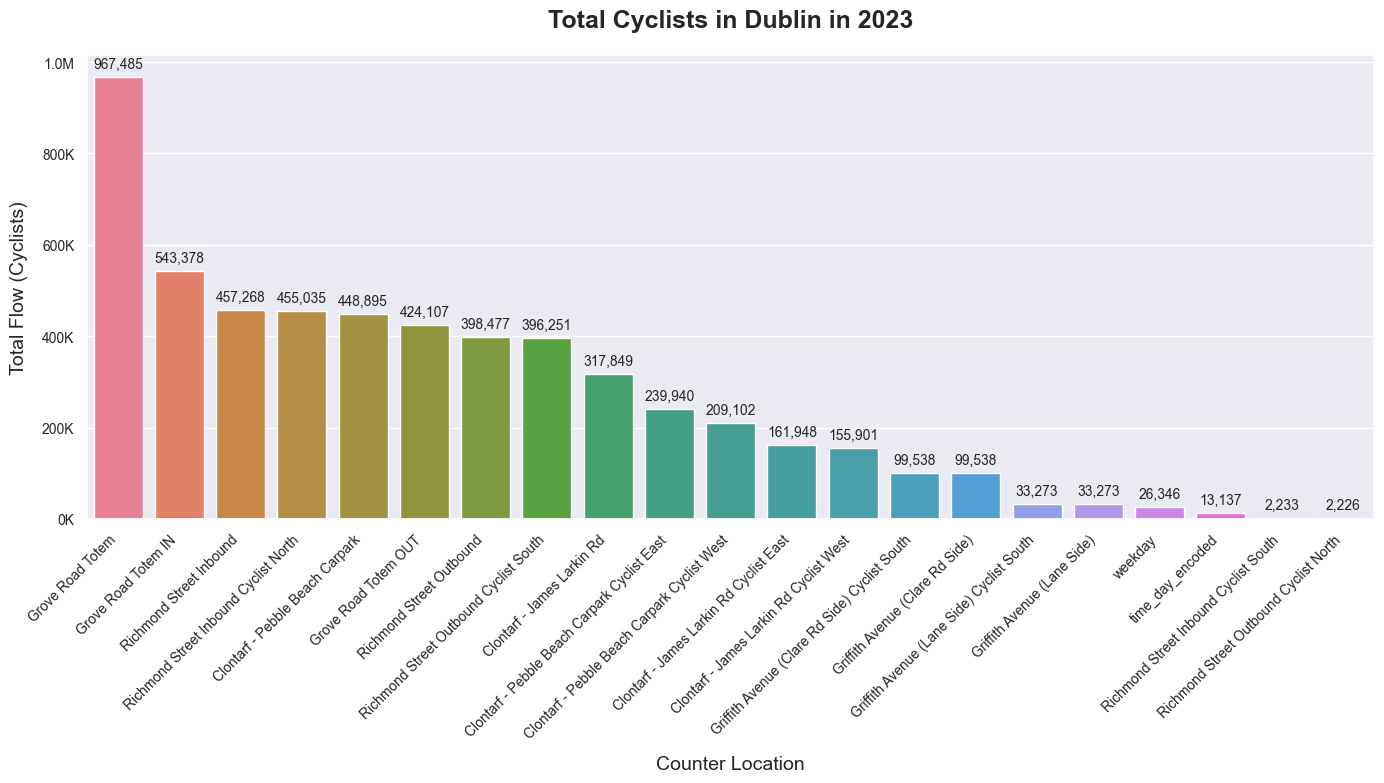

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_columns = cycle_data.select_dtypes(include=['float64', 'int64'])
# cyclists per location
total_flow = numeric_columns.sum().sort_values(ascending=False)

# seaborn style
sns.set_theme(style="darkgrid")

# Different colors for each counter
palette = sns.color_palette("husl", len(total_flow))

# Graph using seaborn
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=total_flow.index, y=total_flow.values, palette=palette, hue=total_flow.index)

# bar total number
for i, value in enumerate(total_flow.values):
    ax.text(i, value + 20000, f'{int(value):,}', ha='center', fontsize=10)

# titles and axis settings
plt.title("Total Cyclists in Dublin in 2023", fontsize=18, weight='bold', pad=20)
plt.xlabel("Counter Location", fontsize=14, labelpad=10)
plt.ylabel("Total Flow (Cyclists)", fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# value in M
max_value = total_flow.max()
plt.yticks(np.arange(0, max_value + 100000, 200000), 
           [f'{int(x / 1000000 * 10) / 10}M' if x >= 1000000 else f'{int(x / 1000)}K' for x in np.arange(0, max_value + 100000, 200000)])

# layout
plt.tight_layout()

# show graph
plt.show()

**Findings**
1. **Highest Traffic Locations:** Grove Road Totem with nearly 1 million cyclists in 2023 (967,485).

    - Nearly double the number of the second-highest location.
    - Indicating good infrastructure, and strategic location.
    
2. **Lowest Traffic Locations:** Richmond Street Inbound Cyclist South with only 2,200 cyclists.

    - The lowest traffic location in 2023.
    - Indicates the need for investment in infrastructure.

## Daily Number of Cyclist in 2023
<a id="Average-Cyclist-by-Hour-of-Day"></a>

Identify the peak hours of cycling traffic in Dublin city.

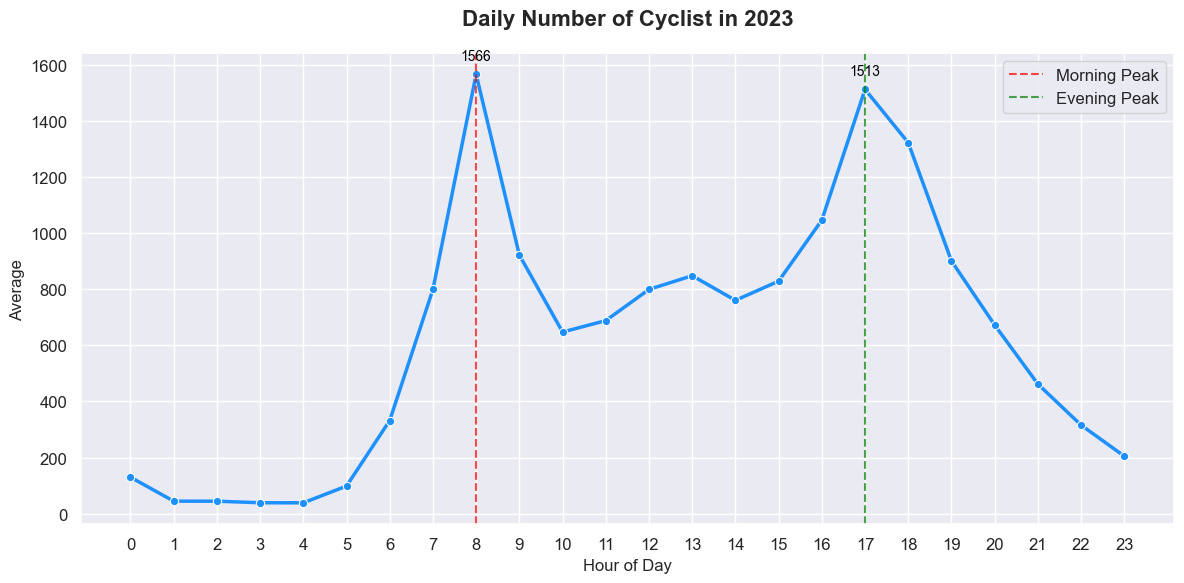

In [90]:
cycle_data['Time'] = pd.to_datetime(cycle_data['Time'])

# Ensure 'hour' is extracted from the 'Time' column
cycle_data['hour'] = cycle_data['Time'].dt.hour

# Aggregate by hour
hourly_flow = numeric_columns.groupby(cycle_data['hour']).mean().sum(axis=1)

# Create line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_flow.index, y=hourly_flow.values, marker='o', color='dodgerblue', linewidth=2.5)

# Add labels for peak hours
for hour, value in hourly_flow.items():
    if hour in [8, 17]:
        plt.text(hour, value + 50, f'{int(value)}', color='black', ha='center', fontsize=10)

# Add title and labels
plt.title("Daily Number of Cyclist in 2023", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average", fontsize=12)

plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)

plt.axvline(8, color='red', linestyle='--', alpha=0.7, label='Morning Peak')
plt.axvline(17, color='green', linestyle='--', alpha=0.7, label='Evening Peak')
plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

**Findings**
The graph shows the average number of cyclists passing by the counters in Dublin city by the hour of the day.

The peak hours are: 8:00 AM where around 1560 cyclists and 5:00 PM where around 1510 cyclists pass by the counters every day.

   - During lunch hours, the average number of cyclists is lower, but still there are around 800 cyclists 01:00 PM.

## Seasonal Number of Cyclist in Dublin in 2023
<a id="Distribution-Over-Time"></a>

- Analyse the data by grouping the data by month to see the cyclists behaviour during the year.
- The line graph shows the flow distribution over time.

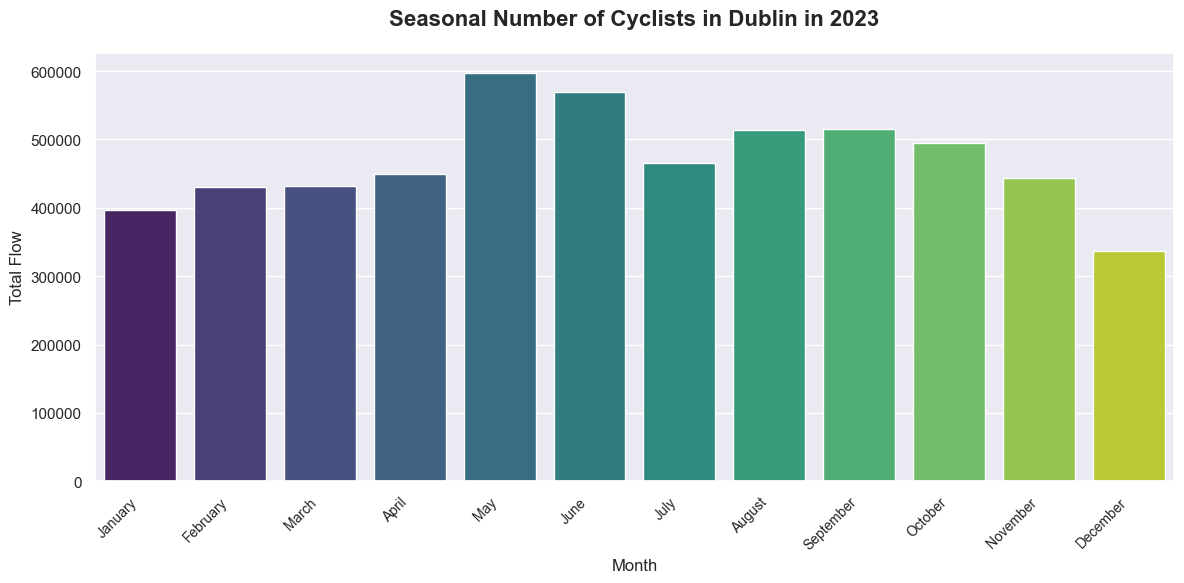

In [91]:
# Ensure the 'Time' column is in datetime format
cycle_data['Time'] = pd.to_datetime(cycle_data['Time'])

# Extract the month from the 'Time' column
cycle_data['Month'] = cycle_data['Time'].dt.month

# group by month
numeric_columns = cycle_data.select_dtypes(include='number')
monthly_total_flow = (cycle_data.groupby(['Month'])[numeric_columns.columns]
                      .sum()
                      .sum(axis=1)
                      .reset_index(name='Total_Flow'))  

# month names
monthly_total_flow['Month_Name'] = pd.to_datetime(monthly_total_flow['Month'], format='%m').dt.strftime('%B')

# Sort by month
monthly_total_flow = monthly_total_flow.sort_values(by='Month')

# Plot the bar chart 
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_total_flow,
    x='Month_Name', 
    y='Total_Flow', 
    palette='viridis', 
    dodge=False, 
    hue='Month_Name' 
)

# title and axis labels
plt.title("Seasonal Number of Cyclists in Dublin in 2023", fontsize=16, weight='bold', pad=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Flow", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

**Findings**
- The graph shows the total number of cyclists passing by the counters in Dublin city by month.
- The peak is in May, with nearly 600,000 cyclists. Followed by June, with around 550,000 cyclists.
- The lowest traffic is in December, with around 300,000 cyclists.

The seasonal variation in the data is due to the weather conditions in Dublin city, with more cyclists during the warmer months.

# Conclusion
<a id="Conclusion"></a>

- This analysis was done to understand the cycling traffic in Dublin city. To help identify the patterns in the data that can be used to improve the infrastructure and the services for cyclists.

- The dataset has a considerable amount of missing values, some locations had to be disregarded for the analysis.
    - It would be interesting to have more data to improve the analysis.
        - Challenges: data quality, since many counters had no data due to roadworks or other issues. Some even after the roadwork were not placed back.

- The Grove Road Totem is the busiest location in Dublin city, having nearly 1 million of cyclists cycling by in 2023.
    - Indicating good infrastructure, and strategic location.

- The application of PCA to reduce dimensionality was successful, with 3 components explaining > 90% of the variance in the data.
    - Out of 17 columns, only 3 components are needed to explain the variance in the data.

- Challenges: The data is right-skewed, with a long tail on the right side with higher values.
    - The outliers in the data represent the variations in traffic, sometimes due to peak hours or some event.
    - However, the data was transformed to reduce the skewness and standardize the data.

- The standardization of the data was important for the PCA analysis.
    - The most important locations are Grove Road Totem, Richmond Street Outbound and Inbound, and Clontarf - Pebble Beach and James Larkin Rd.

----

# References
<a id="References"></a>

1. Eco-Multi Counter from Zelt Diamond Loop - Available at: [https://traffictechnology.co.uk/blog/portfolio/eco-display-light/](https://traffictechnology.co.uk/blog/portfolio/eco-display-light/) [Accessed 4 November 2024].

2. Dublin City Council and the NTA - Available at: [https://data.gov.ie/dataset/dublin-city-centre-cycle-counts/resource/d3dc292c-1612-4474-8218-c0bbddce77b0](https://data.gov.ie/dataset/dublin-city-centre-cycle-counts/resource/d3dc292c-1612-4474-8218-c0bbddce77b0) [Accessed 4 November 2024].

3. IBM (n.d.) *What is Exploratory Data Analysis (EDA)?* Available at: [https://www.ibm.com/topics/exploratory-data-analysis](https://www.ibm.com/topics/exploratory-data-analysis) [Accessed 16 November 2024].

4. *Guide to Exploratory Data Analysis* - Available at: [https://towardsdatascience.com/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6](https://towardsdatascience.com/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6) [Accessed 16 November 2024].

5. Interpolation using SciPy - Available at: [https://docs.scipy.org/doc/scipy/tutorial/interpolate.html](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html) [Accessed 18 November 2024].

6. Atlassian (n.d.) *A complete guide to scatter plots*. Available at: [https://www.atlassian.com/data/charts/what-is-a-scatter-plot](https://www.atlassian.com/data/charts/what-is-a-scatter-plot) [Accessed 29 November 2024].

7. Leaflet - JavaScript library for interactive maps. Available at: [https://leafletjs.com/](https://leafletjs.com/) [Accessed 22 November 2024].

8. OpenStreetMap contributors (n.d.) *OpenStreetMap Data*. Available at: [https://www.openstreetmap.org/](https://www.openstreetmap.org/) [Accessed 22 November 2024].

9. Marsja, E. (n.d.) *How to use Square Root, log, & Box-Cox Transformation in Python*. Available at: [https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/](https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/) [Accessed 24 November 2024].

10. Lecture Notes:  
   Iqbal, M. (2024) *Data Exploration & Preparation*. Lectures delivered as part of the *Data Analysis* module in the *BSc (Hons) in Computing in IT (September 2021 cohort)*, CCT College Dublin. Available at: [https://moodle.cct.ie/course/view.php?id=1705](https://moodle.cct.ie/course/view.php?id=1705) [Accessed 2 October 2024].
